# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [1]:
# if plotnine is not installed in Jupter then use the following command to install it 
!pip install plotnine

Running this project require the following imports 

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

from sklearn.mixture import GaussianMixture
import seaborn as sns
import plotly.express as px


import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture


In [3]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



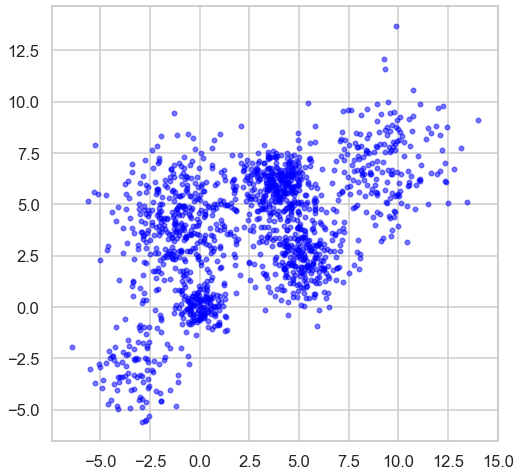

In [4]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

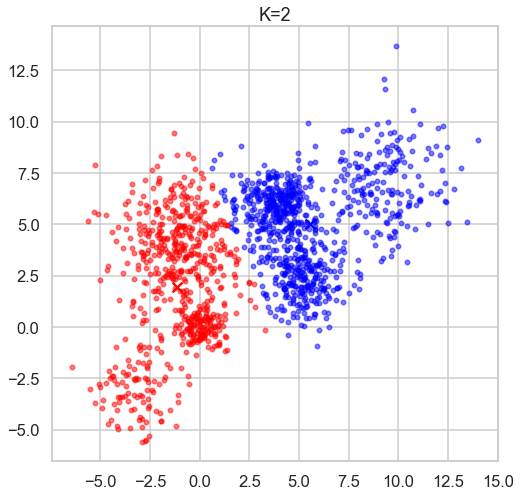

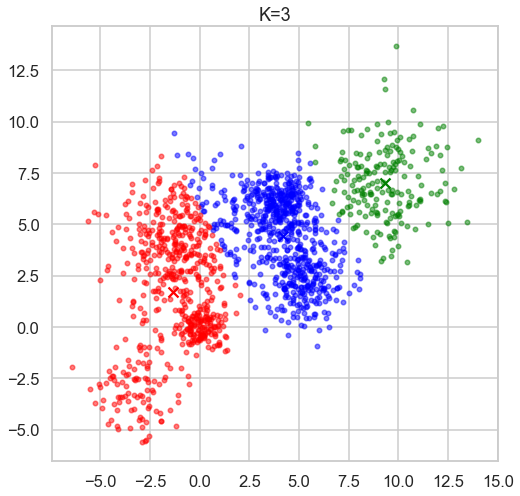

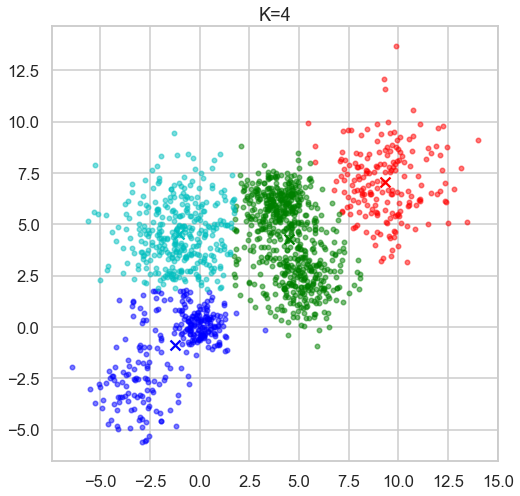

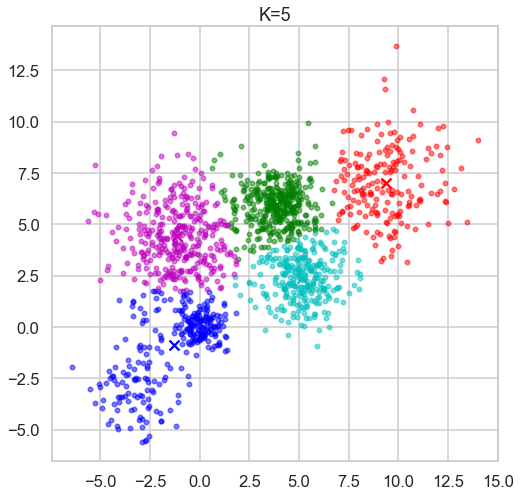

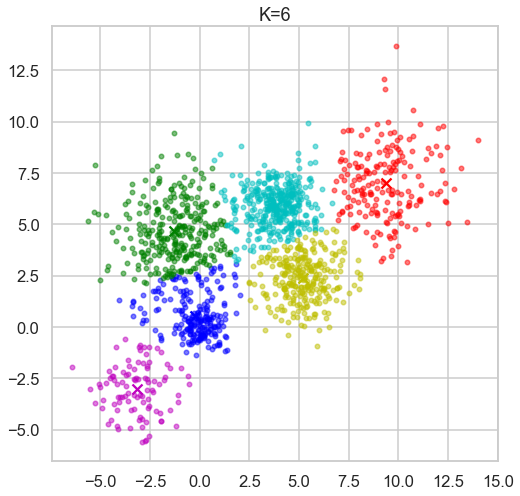

In [5]:
# Using kmeans clustering to cluster the data with different values of k and calculating distortion and silhouette score for each value of k
Kvalues=range(2,7)
distortions=[]
silhouettes=[]
for K in Kvalues:
    KM=KMeans(n_clusters=K, random_state=42)
    KM.fit(Multi_blob_Data)
    distortions.append(KM.inertia_)
    silhouettes.append(silhouette_score(Multi_blob_Data, KM.labels_))
    plt.figure()
    display_cluster(Multi_blob_Data, KM, K)
    plt.title("K={}".format(K))
    plt.show()

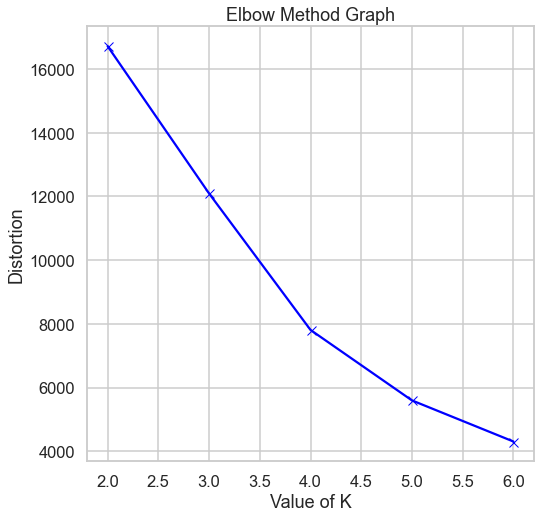

In [6]:
# plotting distortion score versus K
plt.figure()
plt.plot(Kvalues, distortions, 'bx-')
plt.xlabel('Value of K')
plt.ylabel('Distortion')
plt.title('Elbow Method Graph')
plt.show()

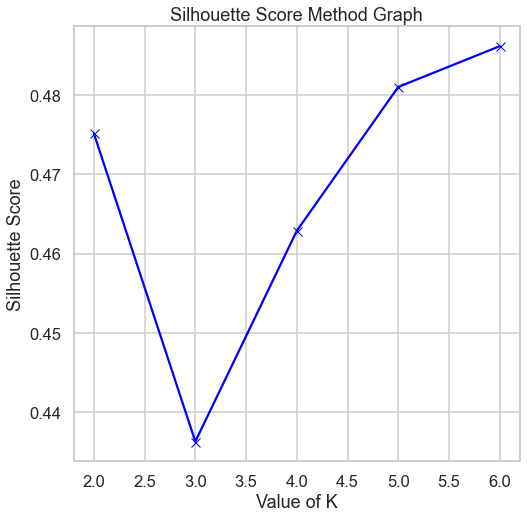

In [7]:
# plotting silhouette score versus K
plt.figure()
plt.plot(Kvalues, silhouettes, 'bx-')
plt.xlabel('Value of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method Graph')
plt.show()

In [8]:
# choosing the best value for K based on silhouette score 
BestK=np.argmax(silhouettes) + 2
print("Best value of K is : ", BestK)

Best value of K is :  6


### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

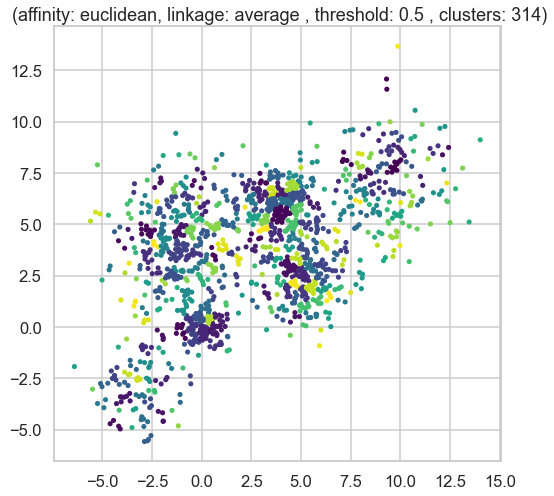

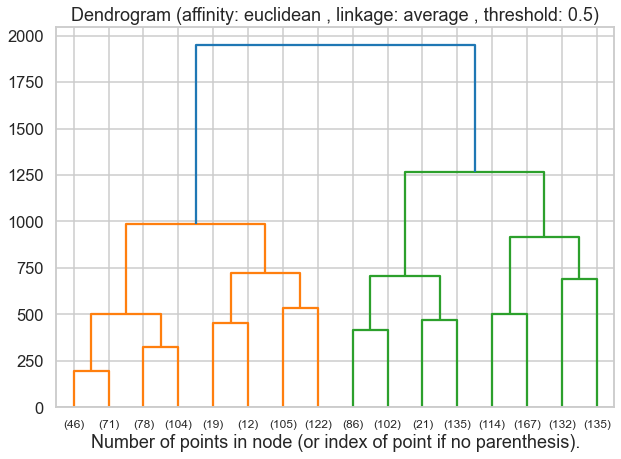

Silhouette score: 0.3743241305054584
Number of clusters: 314


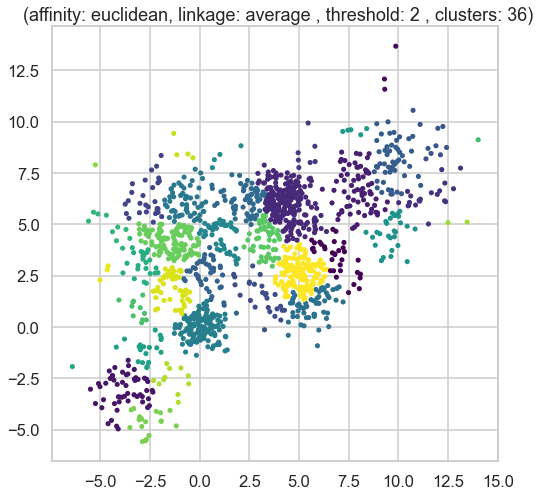

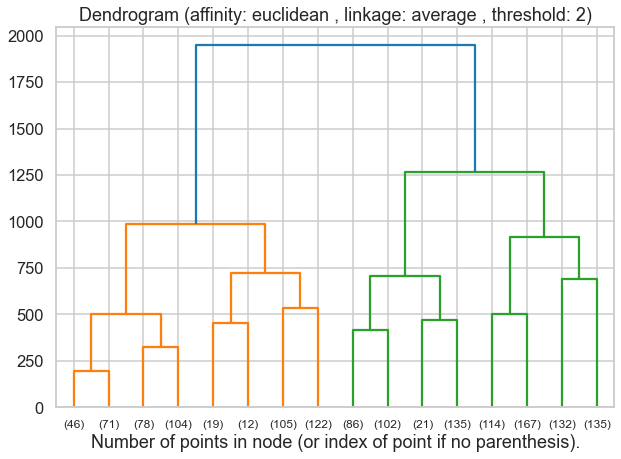

Silhouette score: 0.31557101720950825
Number of clusters: 36


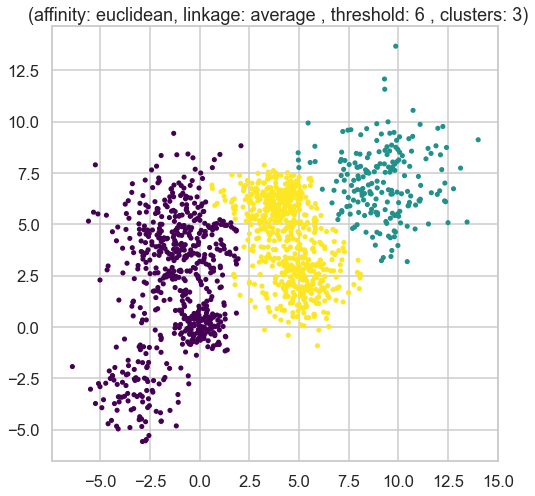

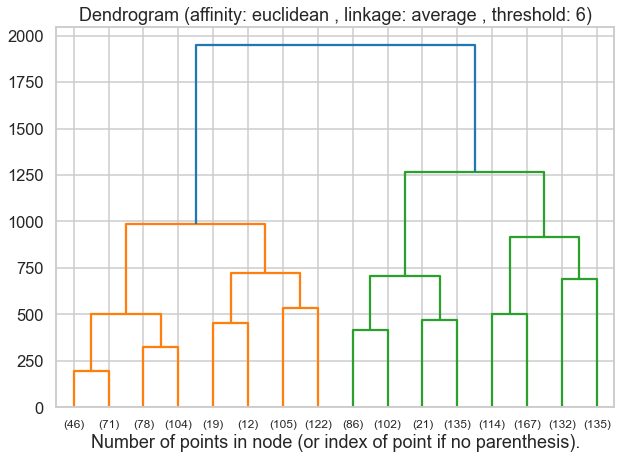

Silhouette score: 0.4307906732655957
Number of clusters: 3


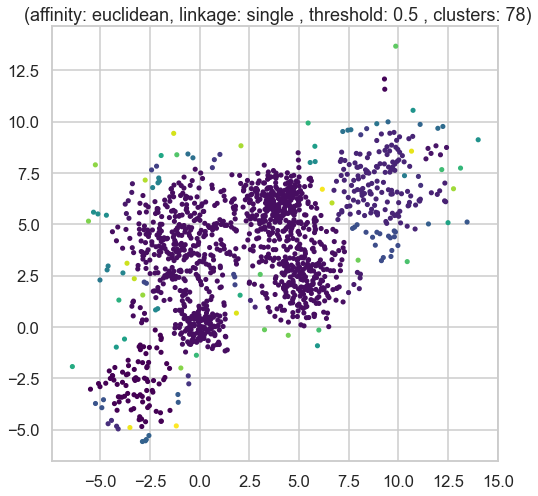

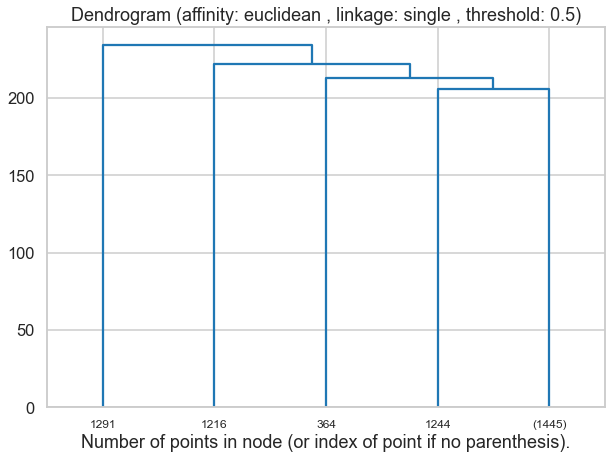

Silhouette score: -0.45965502592646973
Number of clusters: 78


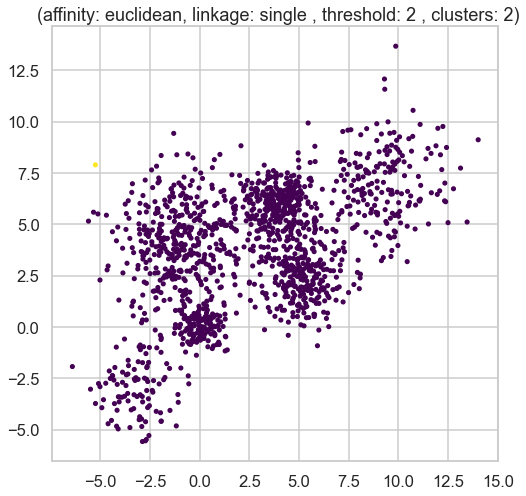

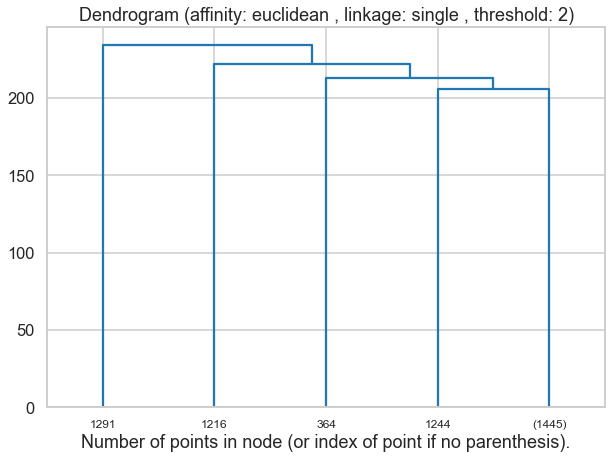

Silhouette score: 0.3218066204847175
Number of clusters: 2


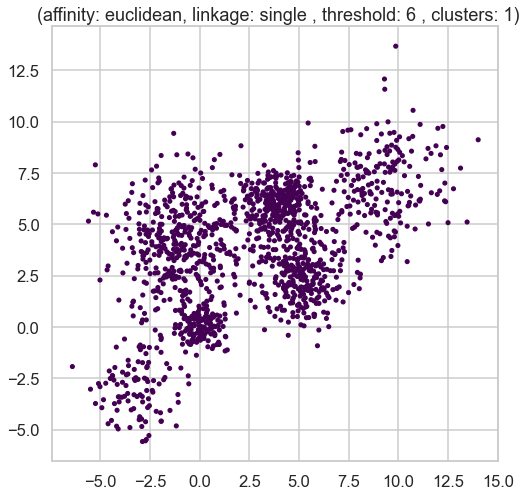

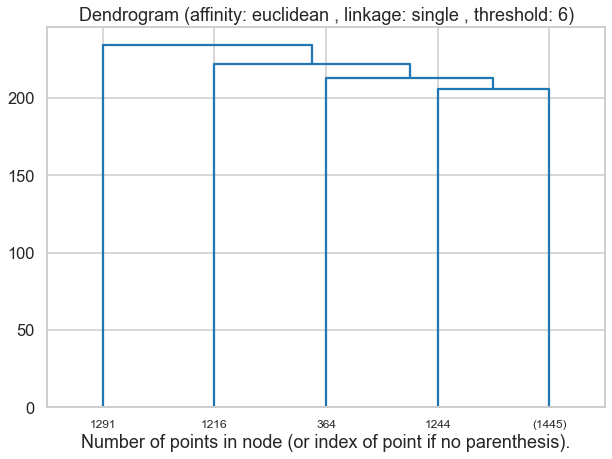

Silhouette score: 0.3218066204847175
Number of clusters: 1


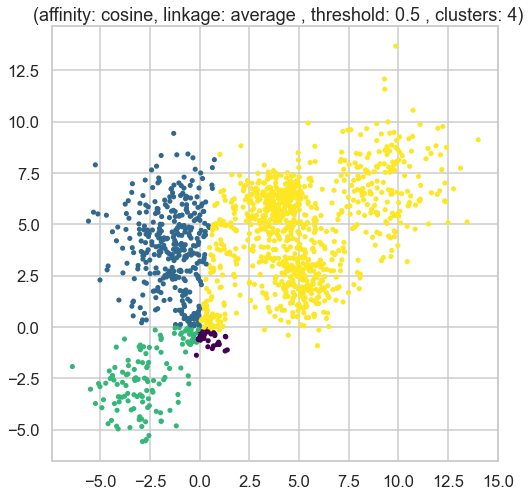

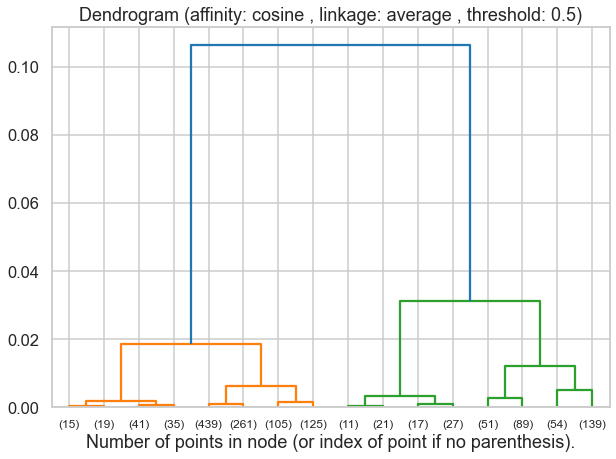

Silhouette score: 0.28022113778340446
Number of clusters: 4


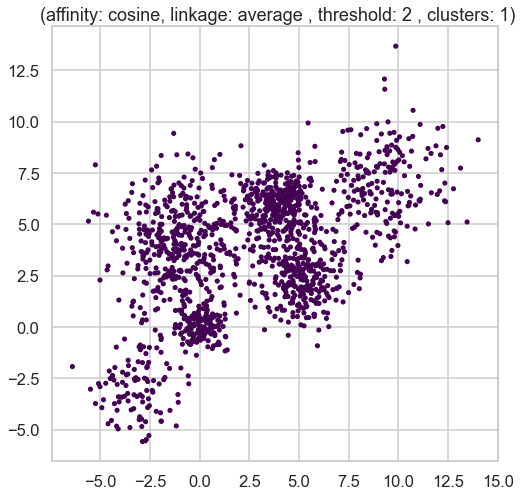

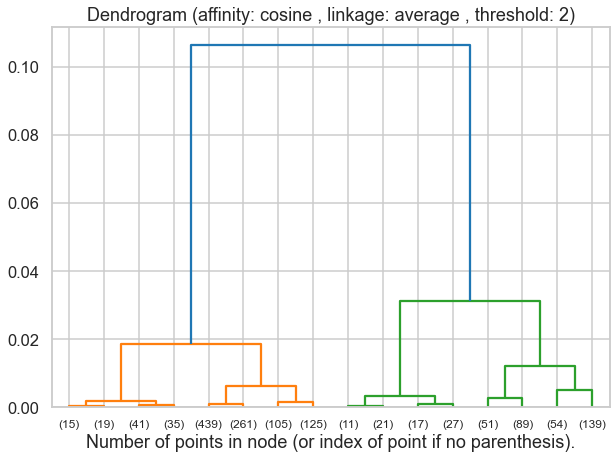

Silhouette score: 0.28022113778340446
Number of clusters: 1


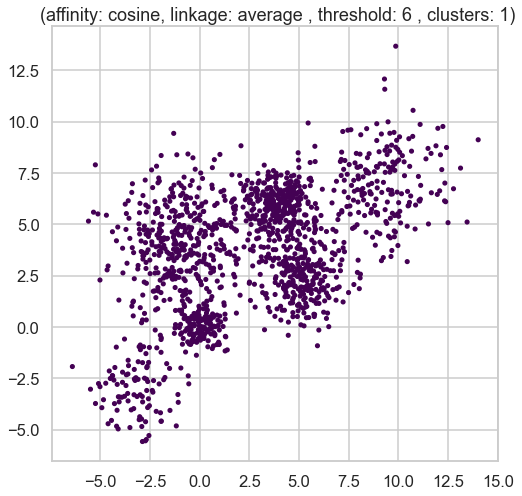

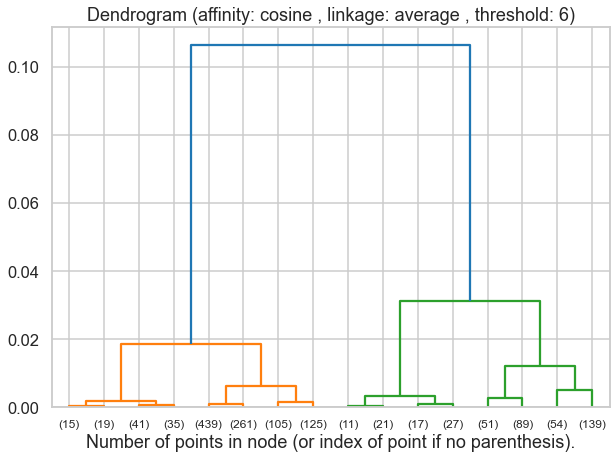

Silhouette score: 0.28022113778340446
Number of clusters: 1


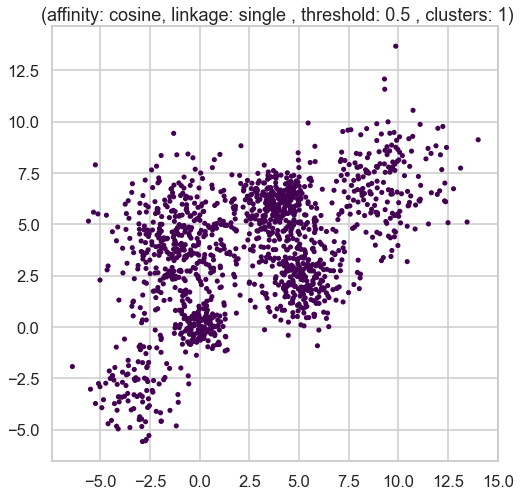

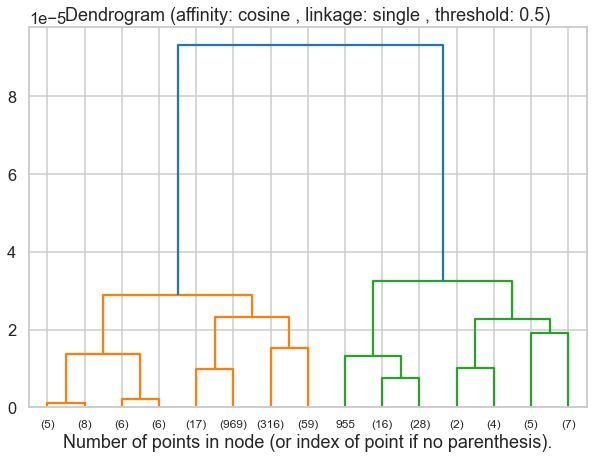

Silhouette score: 0.28022113778340446
Number of clusters: 1


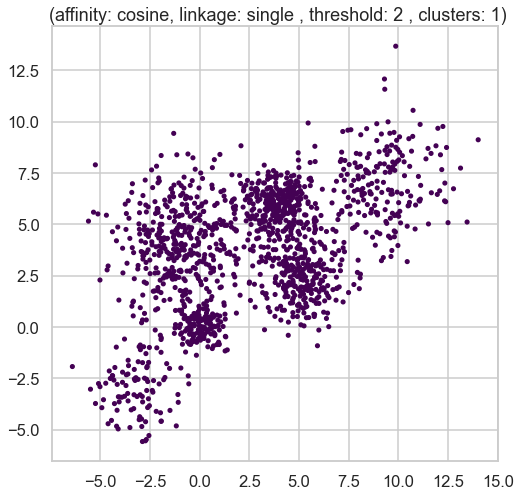

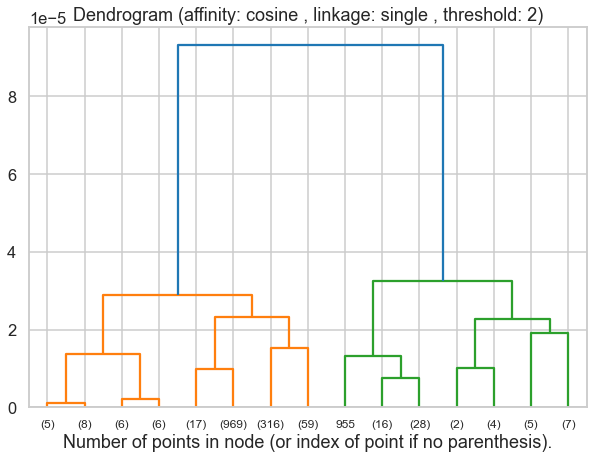

Silhouette score: 0.28022113778340446
Number of clusters: 1


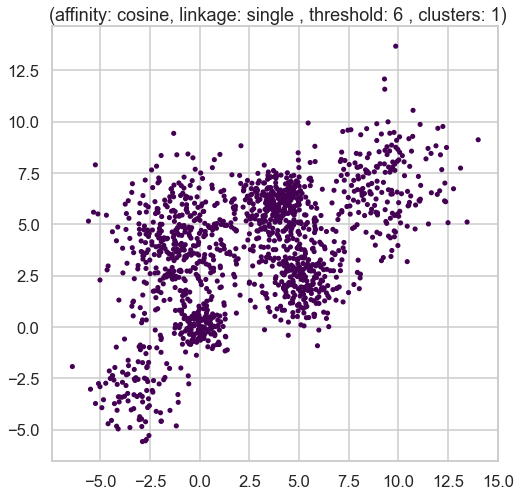

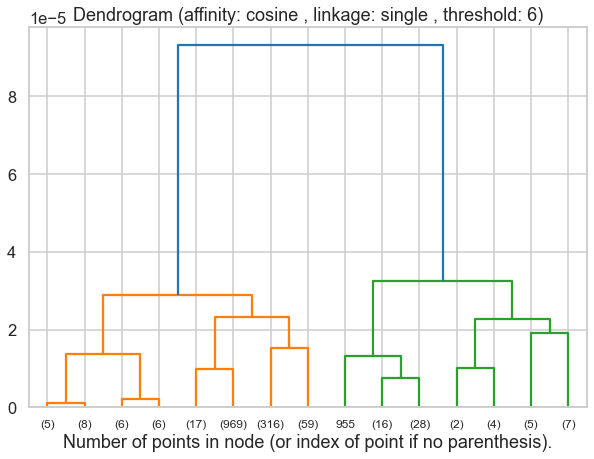

Silhouette score: 0.28022113778340446
Number of clusters: 1
Best Silhouette score: 0.4307906732655957
Number of clusters in best model: 3


In [9]:
NumOfClusters=[]
affinities=['euclidean', 'cosine']
linkages=['average', 'single']
thresholds=[0.5,2,6]
BestScore=-1
BestModel=None

for affinity in affinities:
    for linkage_method in linkages:
        for threshold in thresholds:
        
            HC = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage_method, distance_threshold=threshold)
            HC.fit(Multi_blob_Data)
            NumOfClusters.append(HC.n_clusters_)
            plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=HC.labels_, s=13, cmap='viridis')
            plt.title(f" (affinity: {affinity}, linkage: {linkage_method} , threshold: {threshold} , clusters: {HC.n_clusters_})")
            
            try:
                score=silhouette_score(Multi_blob_Data, HC.labels_)
            except ValueError:
                pass
            
            if score > BestScore:
                BestScore=score
                BestModel=HC
                
            plt.figure(figsize=(10, 7))
            plt.title(f"Dendrogram (affinity: {affinity} , linkage: {linkage_method} , threshold: {threshold})")
            dendrogram(linkage(HC.children_, method=linkage_method, metric=affinity), truncate_mode='level', p=3)
            plt.xlabel("Number of points in node (or index of point if no parenthesis).")
            plt.show()
            print(f"Silhouette score: {score}")
            print(f"Number of clusters: {len(set(HC.labels_))}")
        
                
                
            
print(f"Best Silhouette score: {BestScore}")
print(f"Number of clusters in best model: {len(set(BestModel.labels_))}")




### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

Best silhouette score: 0.4685207355522043
Best eps: 2.1
Best min_samples: 6


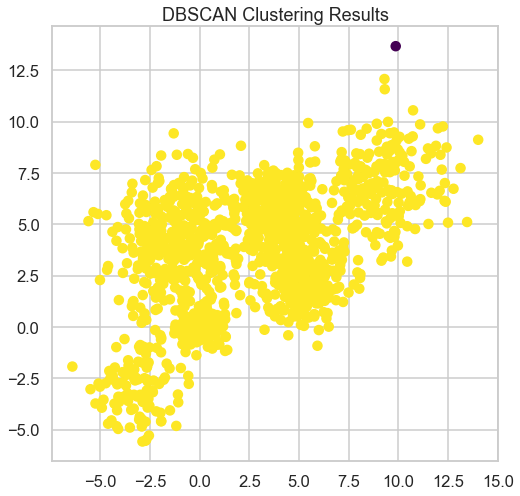

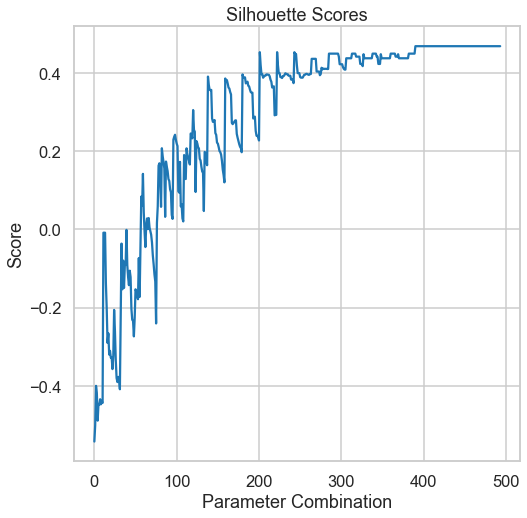

In [10]:
Epsilon=np.arange(0.1, 3.1, 0.1)
MinSamples=range(5, 26)
scores=[]
BestScore=-1

for eps in Epsilon:
    for min_samples in MinSamples:
        DBS = DBSCAN(eps=eps, min_samples=min_samples)
        labels = DBS.fit_predict(Multi_blob_Data)
        
        if len(np.unique(labels)) == 1:
            continue
        score=silhouette_score(Multi_blob_Data, labels)
        scores.append(score)
        if score > BestScore:
            BestScore=score
            BestEpsilon = eps
            BestMinSamples = min_samples

print("Best silhouette score:", BestScore)
print("Best eps:", BestEpsilon)
print("Best min_samples:", BestMinSamples)

DBS = DBSCAN(eps=BestEpsilon, min_samples=BestMinSamples)
labels = DBS.fit_predict(Multi_blob_Data)

plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels, cmap='viridis')
plt.title("DBSCAN Clustering Results")
plt.show()

plt.plot(scores)
plt.title("Silhouette Scores")
plt.xlabel("Parameter Combination")
plt.ylabel("Score")
plt.show()


### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

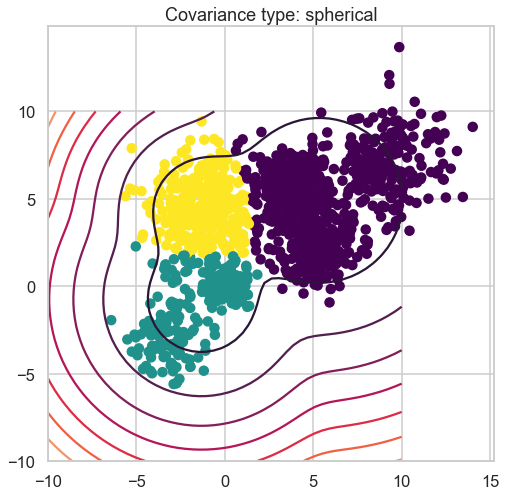

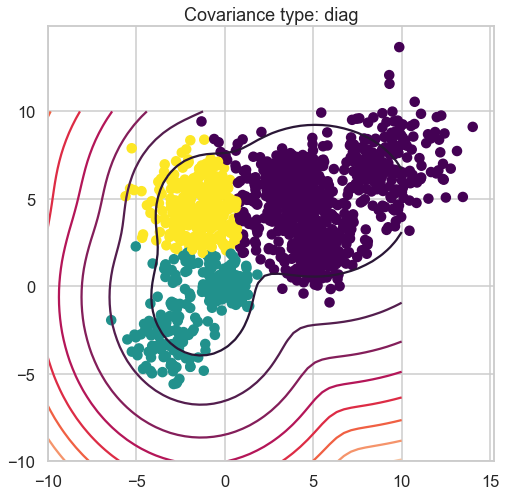

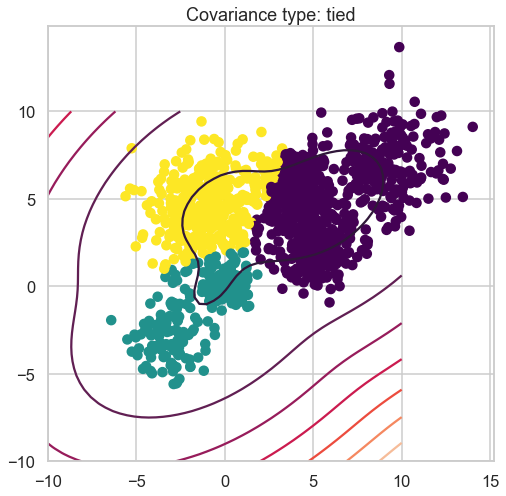

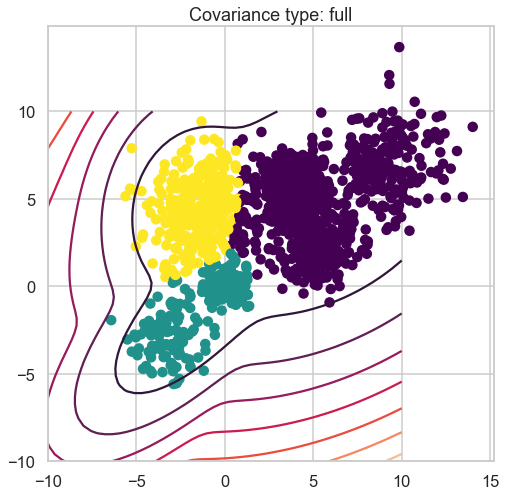

In [11]:
CovarianceTypes = ['spherical', 'diag', 'tied','full']
for cov_type in CovarianceTypes:
    gmm = GaussianMixture(n_components=3, covariance_type=cov_type, random_state=42)
    gmm.fit(Multi_blob_Data)
    labels = gmm.predict(Multi_blob_Data)

    # Visualize the results
    x = np.linspace(-10, 10)
    y = np.linspace(-10, 10)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = -gmm.score_samples(XX)
    Z = Z.reshape(X.shape)

    plt.contour(X, Y, Z)
    plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels, cmap='viridis')
    plt.title(f"Covariance type: {cov_type}")
    plt.show()


## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [12]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']
X = iris_data.data

In [13]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt


from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

from sklearn import datasets
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np


# Kmeans clustering

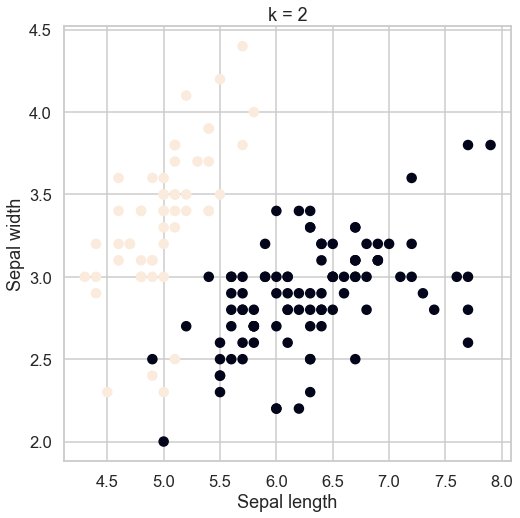

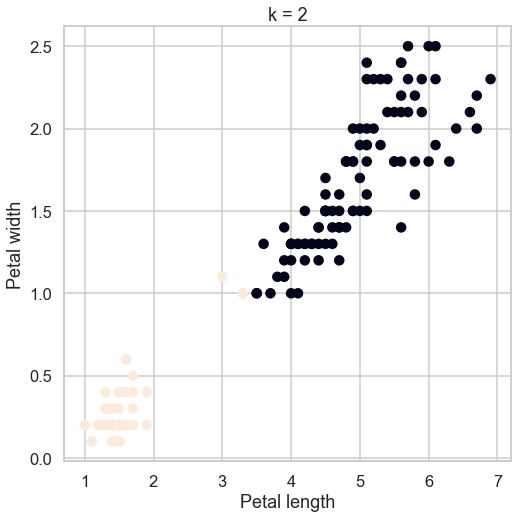

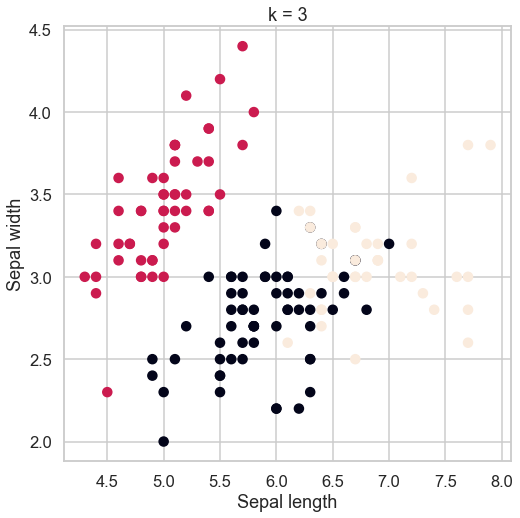

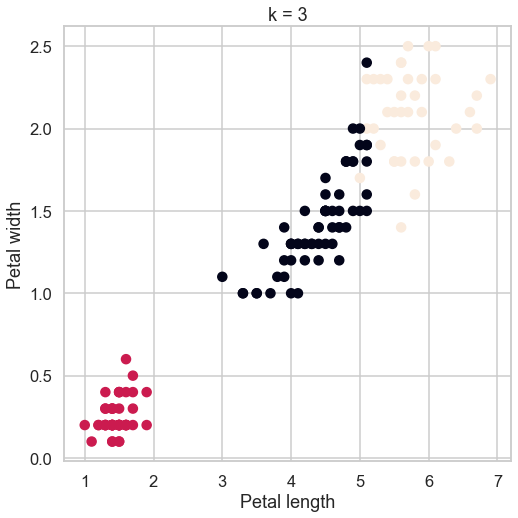

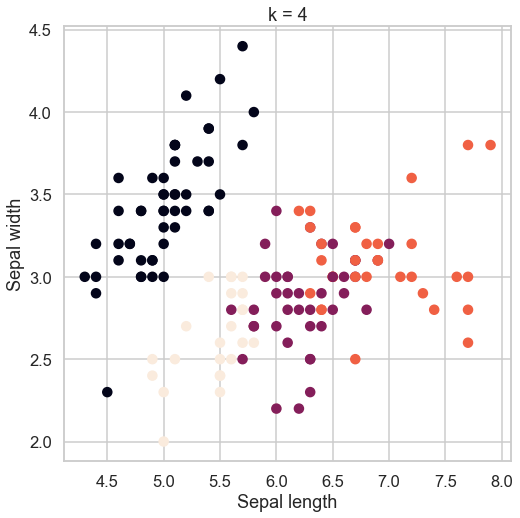

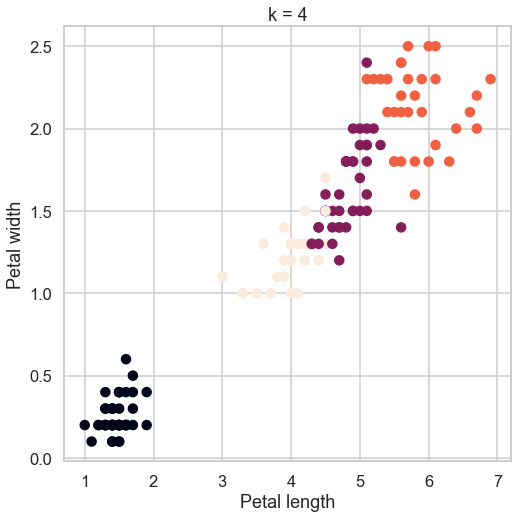

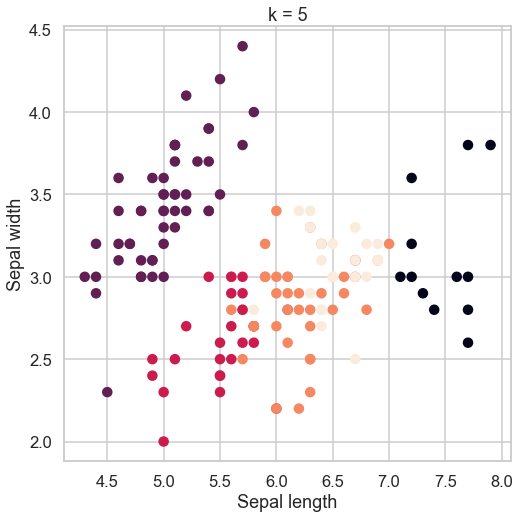

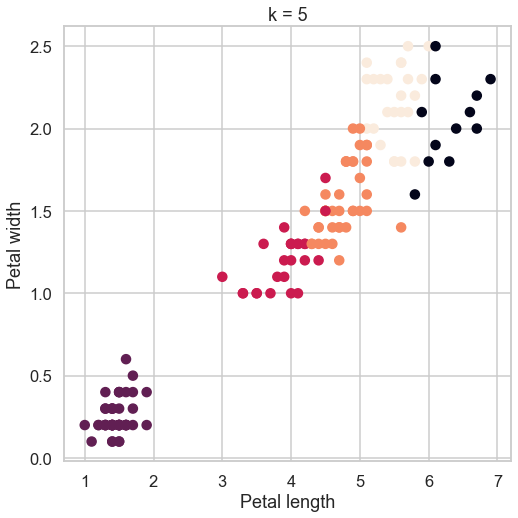

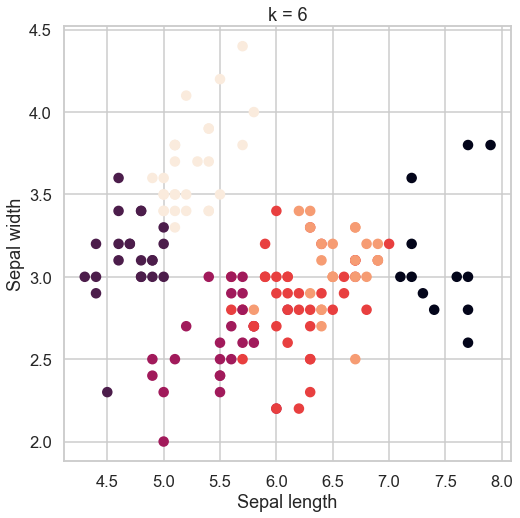

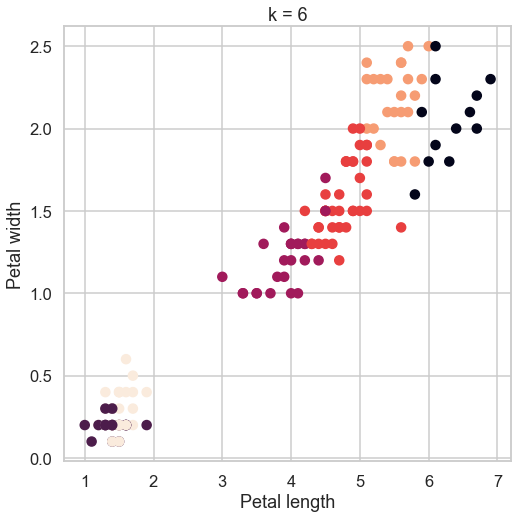

In [15]:
# Define list of values of k to try
Kvalues=range(2,7)
distortions=[]
silhouettes=[]
# Apply k-means clustering for each value of k and plot results
for K in Kvalues:
    # Create k-means model with k clusters
    kmeans = KMeans(n_clusters=K, random_state=42)
    # Fit model to data
    kmeans.fit(X)
    # Get predicted cluster labels for data
    y_pred = kmeans.predict(X)
    distortions.append(kmeans.inertia_)
    if K > 1:
        silhouettes.append(silhouette_score(X, y_pred))
    # Plot results
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('k = {}'.format(K))
    plt.show()
    plt.scatter(X[:, 2], X[:, 3], c=y_pred)
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title('k = {}'.format(K))
    plt.show()


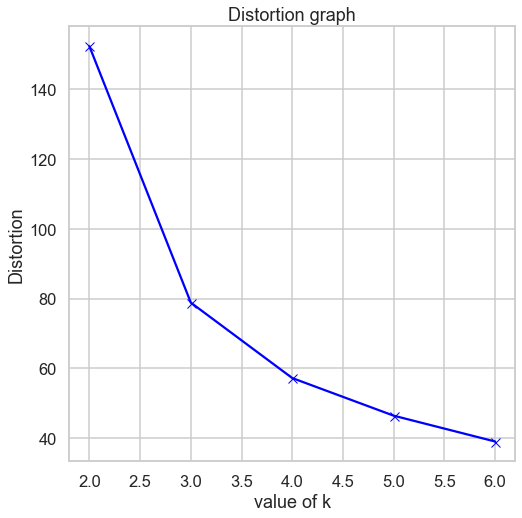

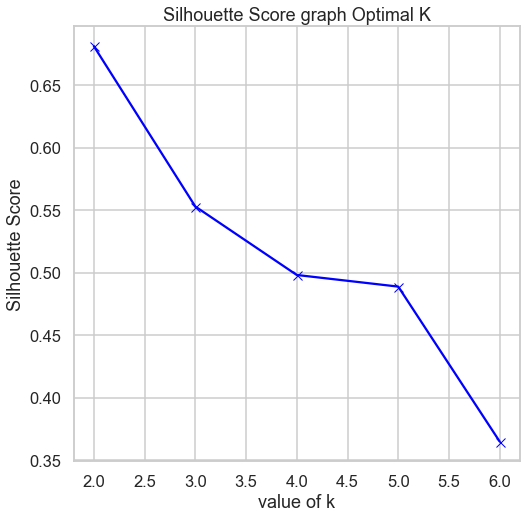

The best K value based on Silhouette Score is: 2


In [16]:
# Plot distortion function vs. K
plt.plot(Kvalues, distortions, 'bx-')
plt.xlabel('value of k')
plt.ylabel('Distortion')
plt.title('Distortion graph')
plt.show()

# Plot silhouette score versus K
plt.plot(Kvalues, silhouettes, 'bx-')
plt.xlabel('value of k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score graph Optimal K')
plt.show()

# Find the best K value based on the highest silhouette score
Bestk = np.argmax(silhouettes) + 2  # Add 2 to account for range of K values starting from 2
print("The best K value based on Silhouette Score is:", Bestk)

# Hierarichal Clustering

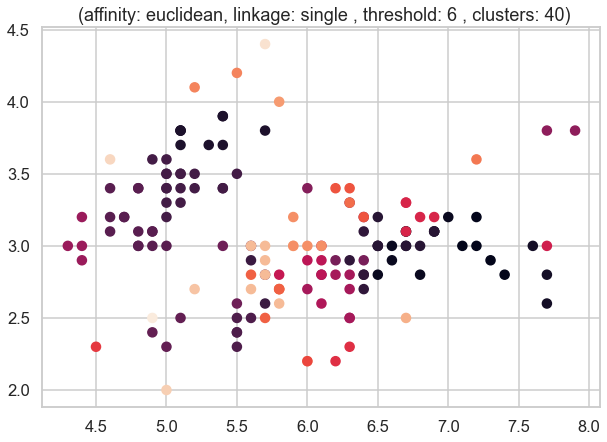

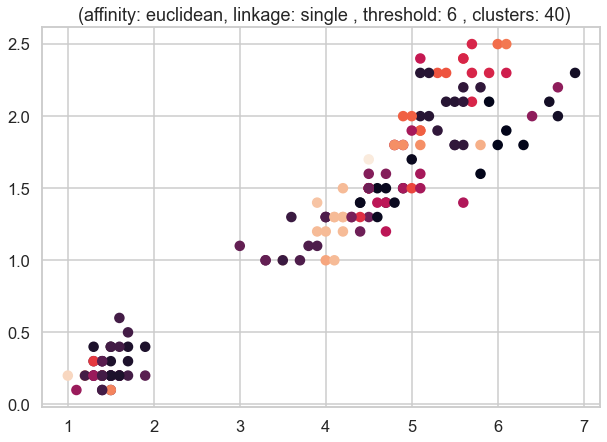

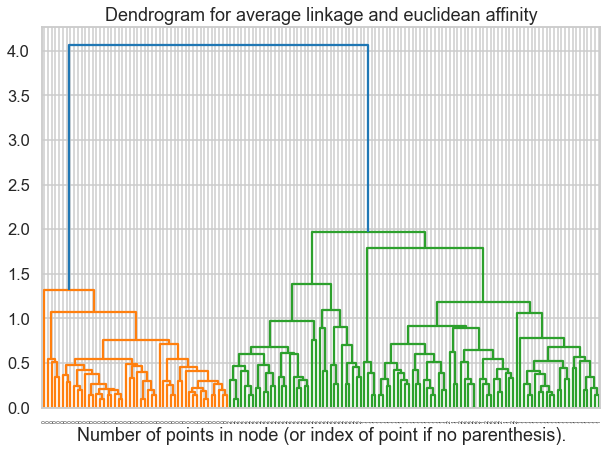

Silhouette score: 0.27137333482577075
Number of clusters: 40


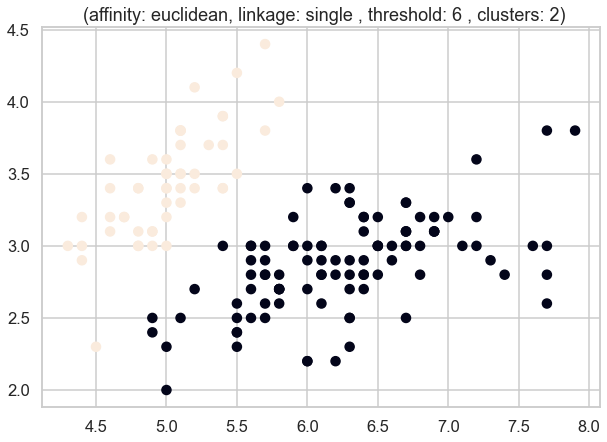

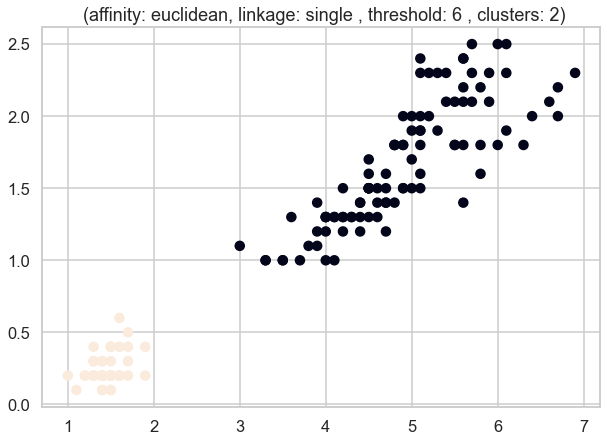

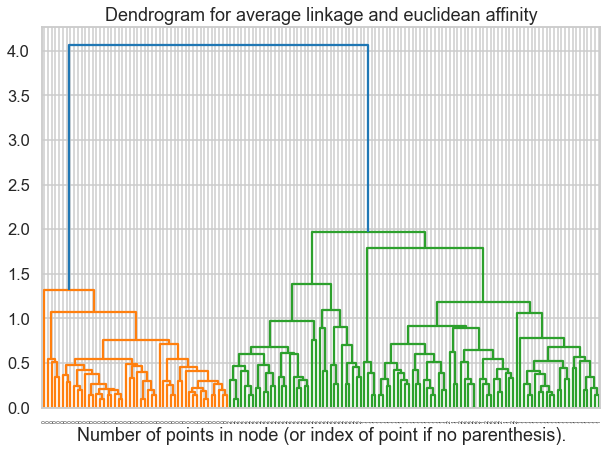

Silhouette score: 0.6867350732769776
Number of clusters: 2


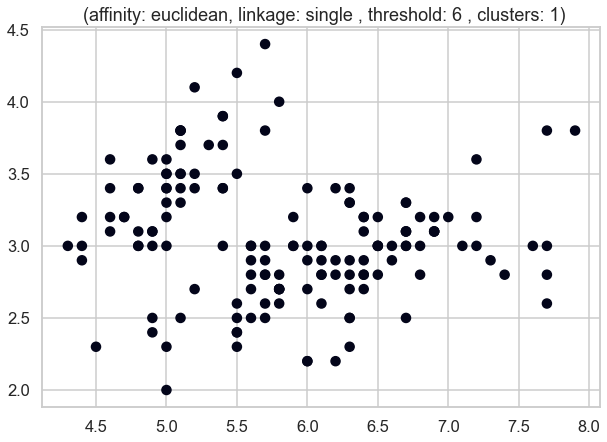

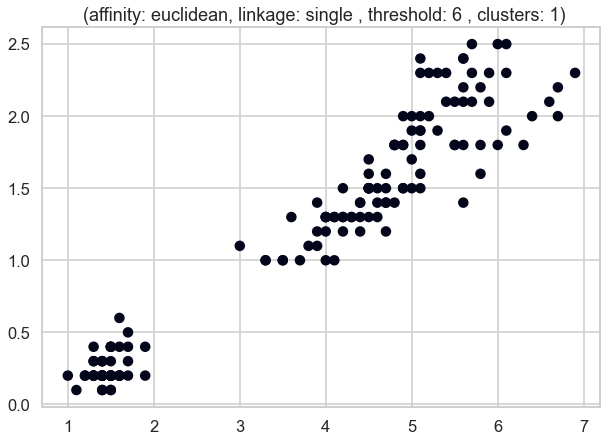

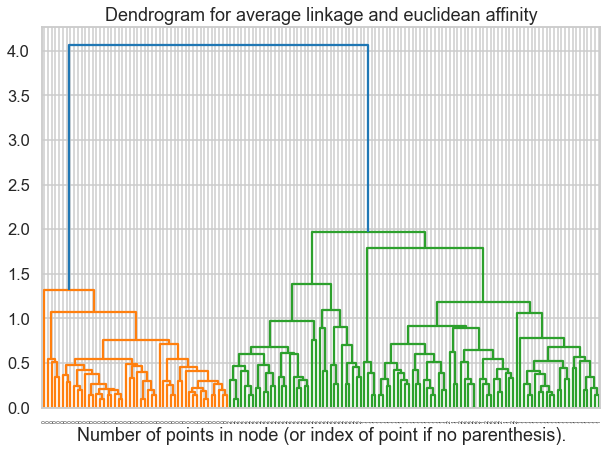

Silhouette score: 0.6867350732769776
Number of clusters: 1


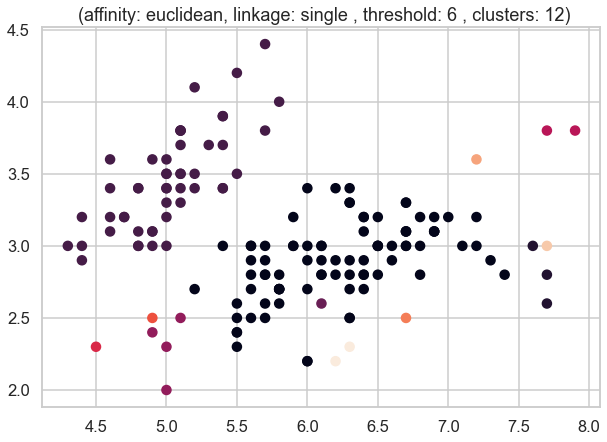

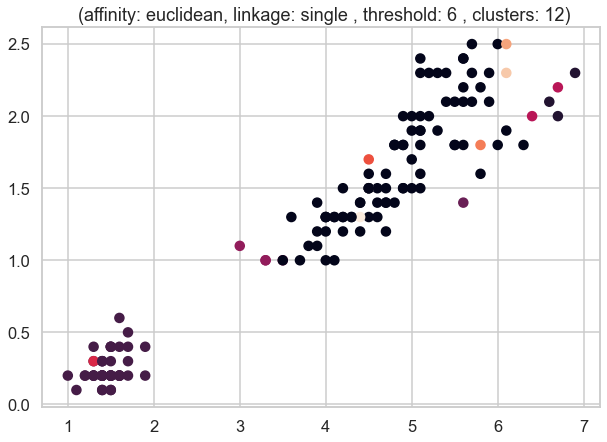

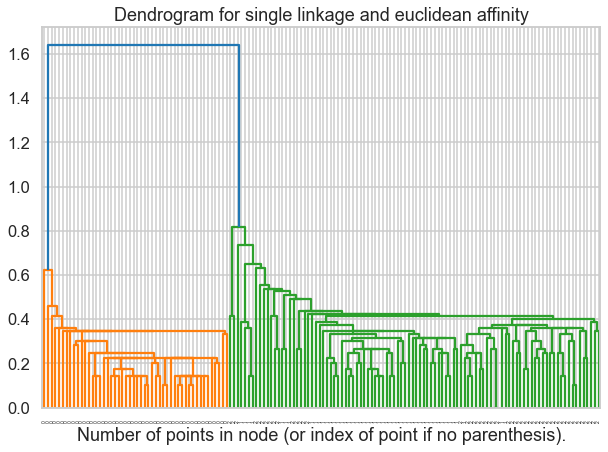

Silhouette score: 0.021476250400665316
Number of clusters: 12


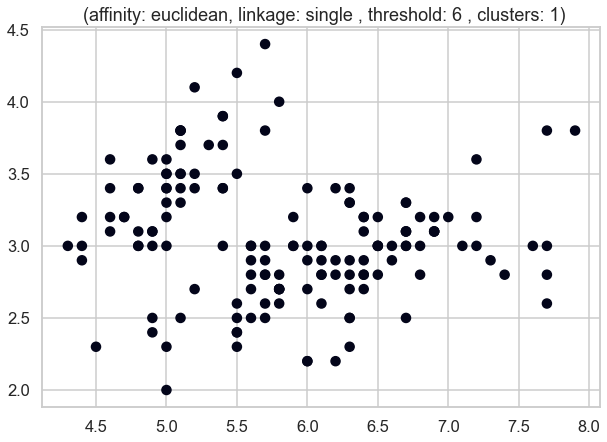

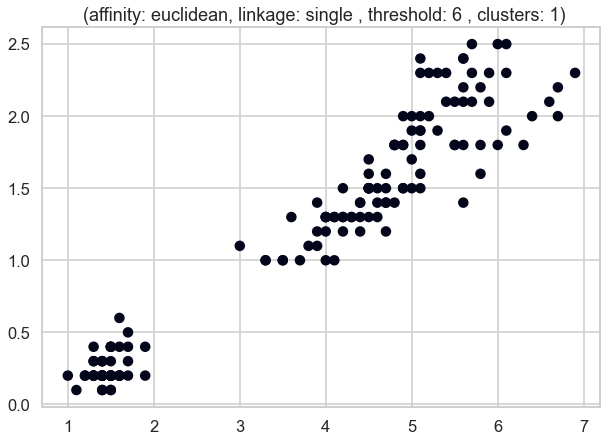

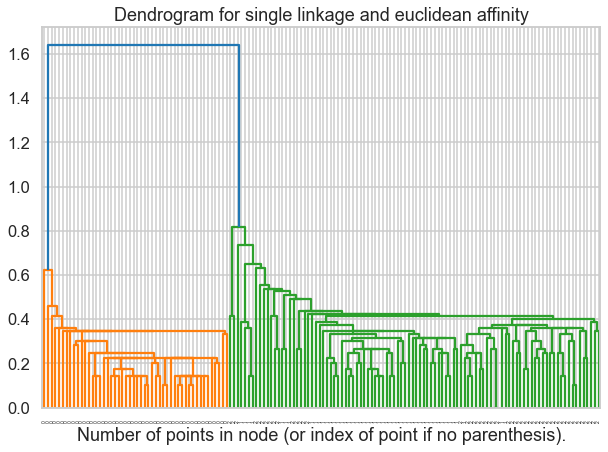

Silhouette score: 0.021476250400665316
Number of clusters: 1


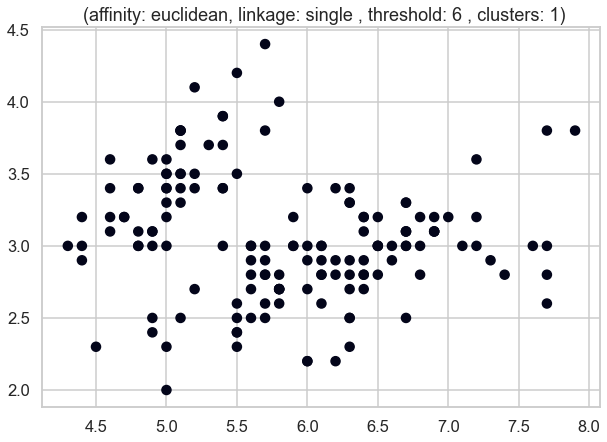

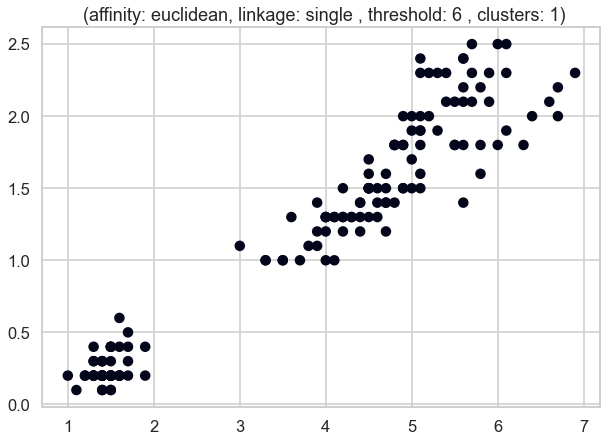

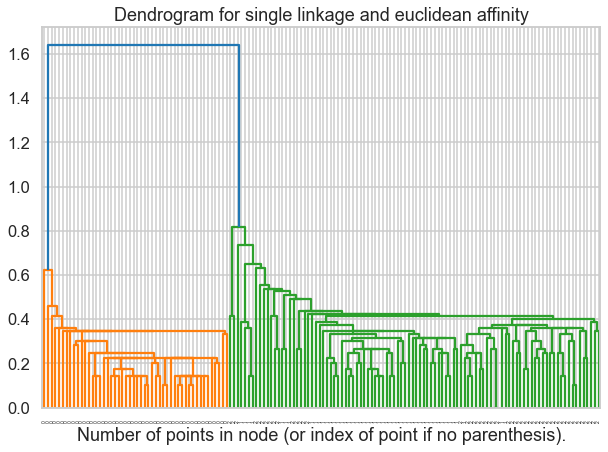

Silhouette score: 0.021476250400665316
Number of clusters: 1


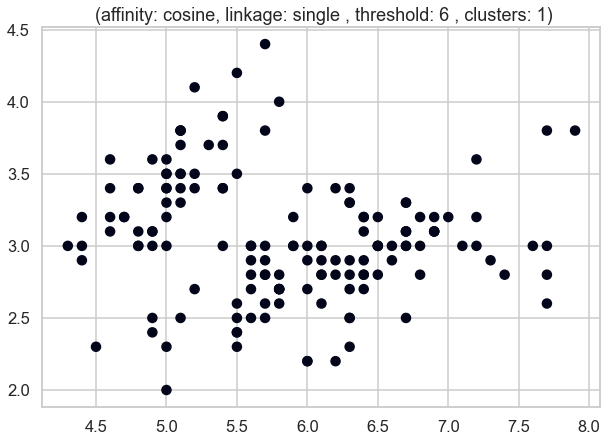

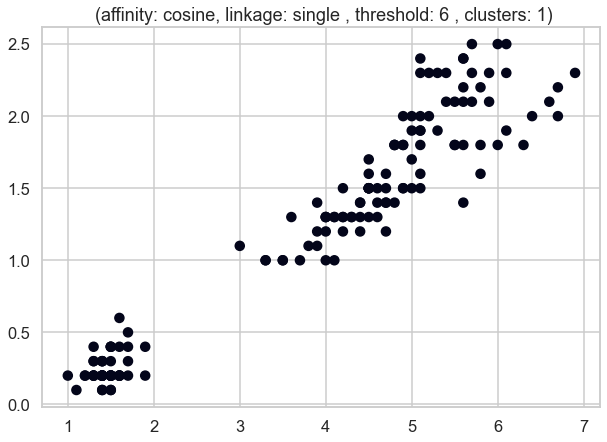

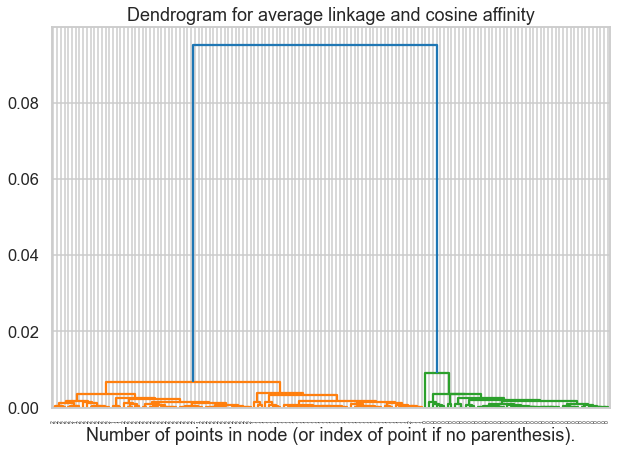

Silhouette score: 0.021476250400665316
Number of clusters: 1


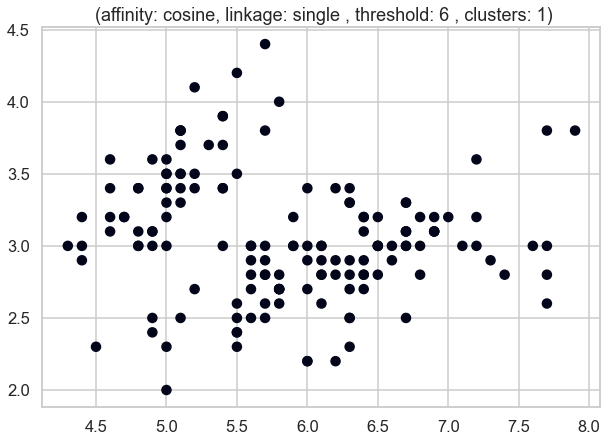

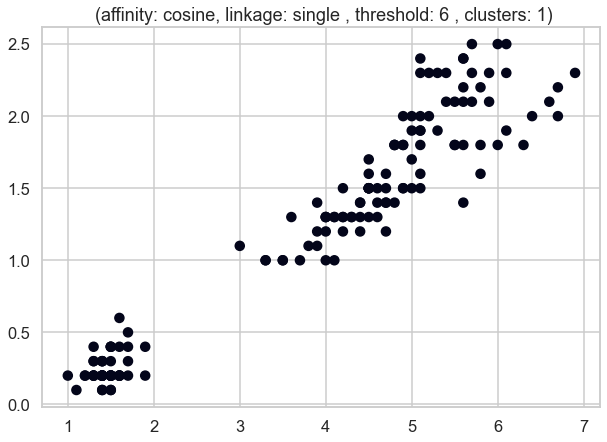

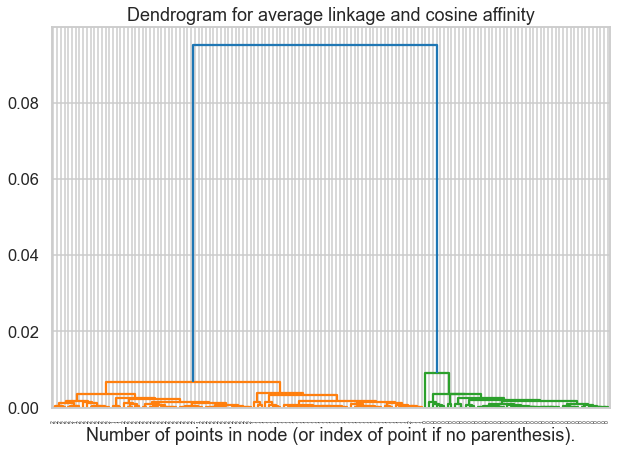

Silhouette score: 0.021476250400665316
Number of clusters: 1


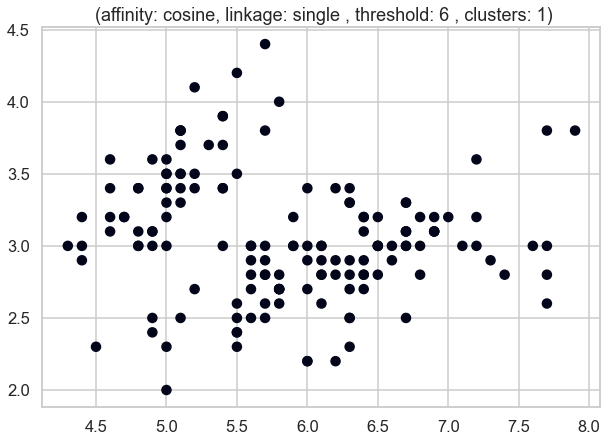

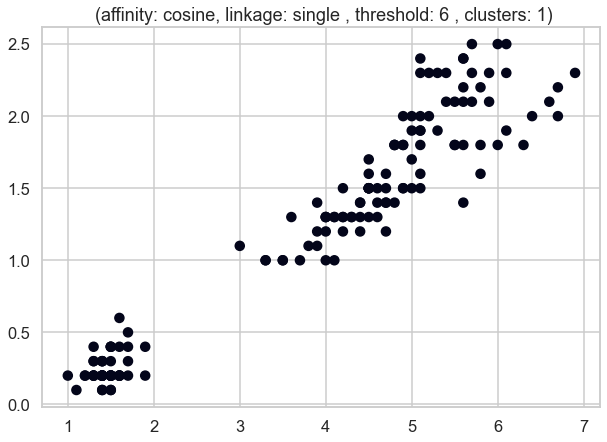

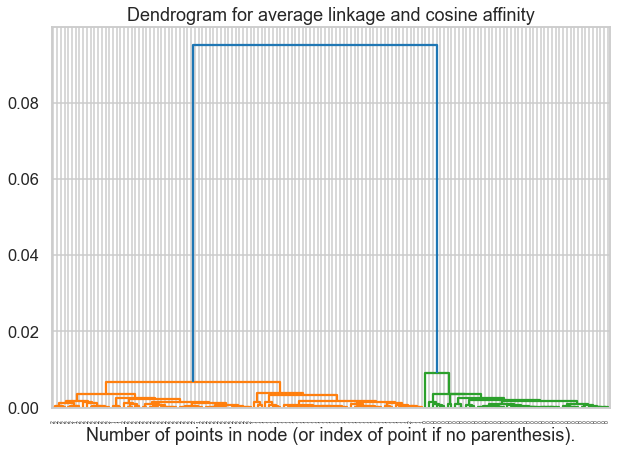

Silhouette score: 0.021476250400665316
Number of clusters: 1


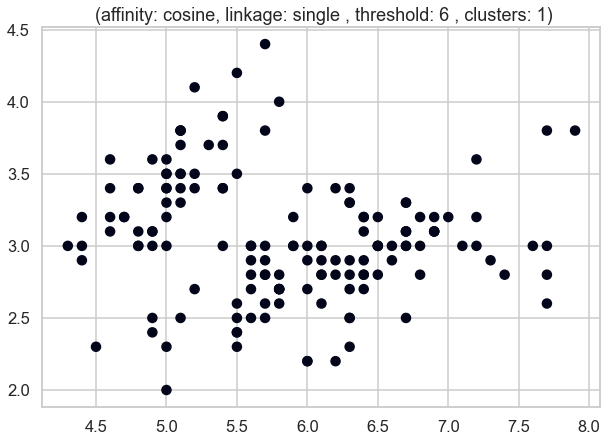

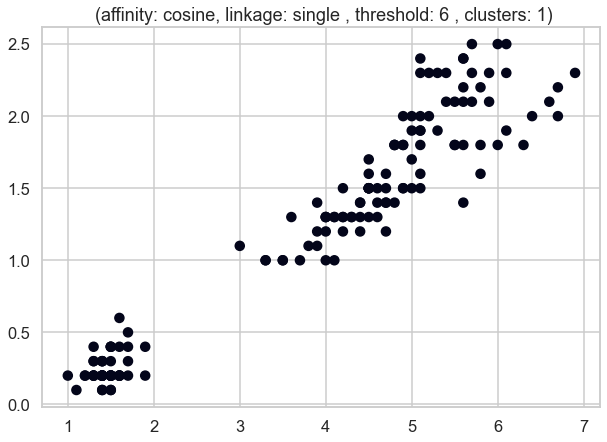

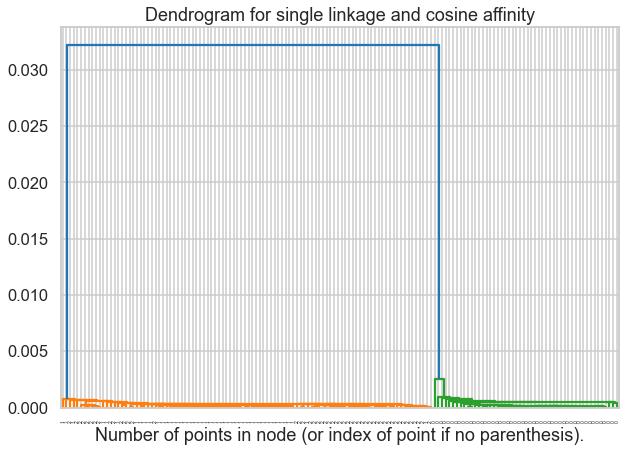

Silhouette score: 0.021476250400665316
Number of clusters: 1


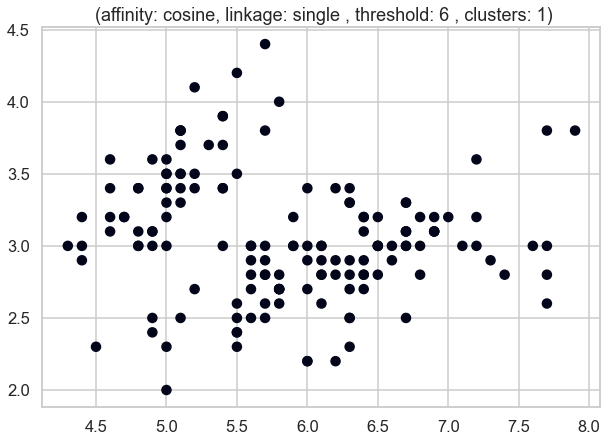

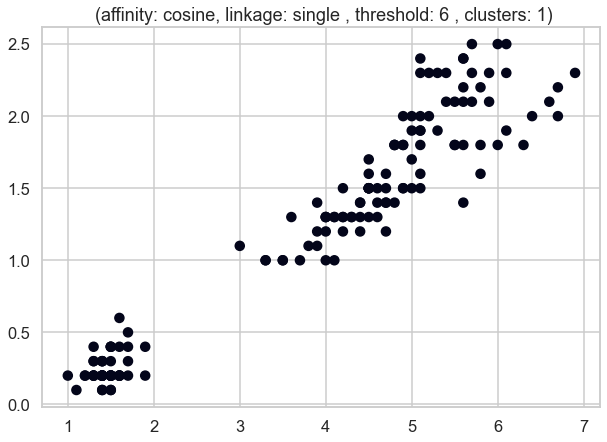

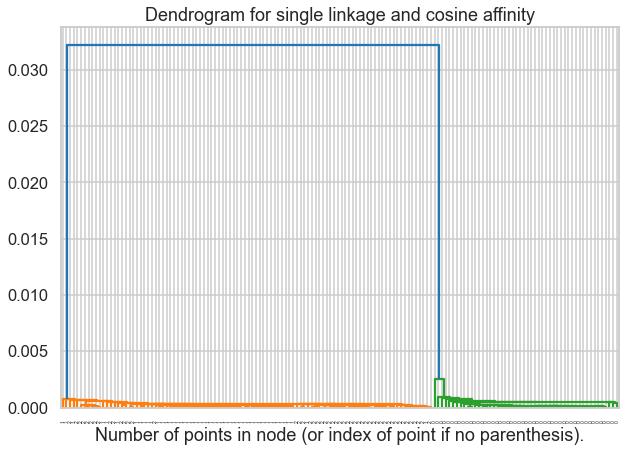

Silhouette score: 0.021476250400665316
Number of clusters: 1


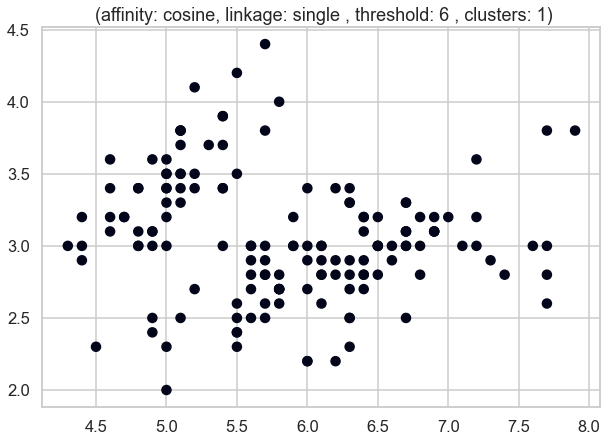

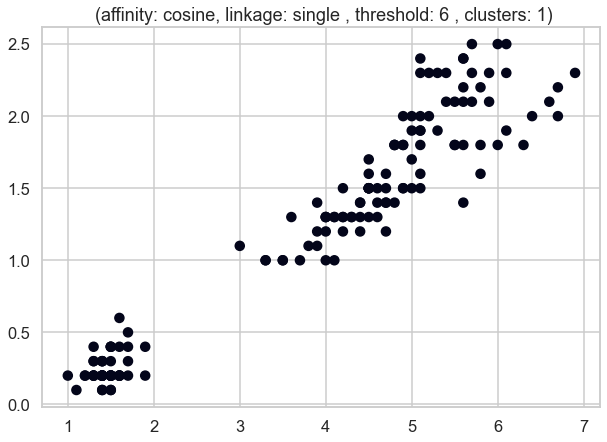

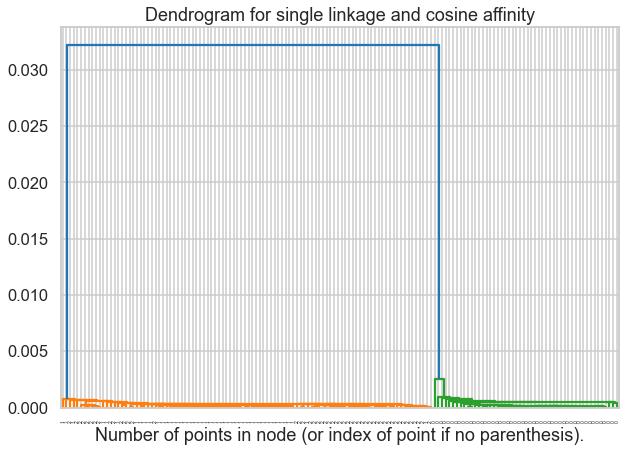

Silhouette score: 0.021476250400665316
Number of clusters: 1
Best Silhouette score: 0.6867350732769776


AttributeError: 'dict' object has no attribute 'labels_'

In [19]:
# define parameter combinations to try
NumOfClusters=[]
affinities=['euclidean', 'cosine']
linkages=['average', 'single']
thresholds=[0.5,2,6]
BestScore=-1
BestModel=None

for affinity in affinities:
    for linkage in linkages:
        for dist_thresh in thresholds:
            HC = AgglomerativeClustering(n_clusters=None,affinity=affinity,linkage=linkage,distance_threshold=dist_thresh)
            labels = HC.fit_predict(iris_data.data)
            NumOfClusters.append(HC.n_clusters_)
            # Display resulting clusters for current parameter combination
            plt.figure(figsize=(10, 7))
            plt.scatter(iris_data.data[:, 0], iris_data.data[:, 1], c=labels)
            plt.title(f" (affinity: {affinity}, linkage: {linkage_method} , threshold: {threshold} , clusters: {HC.n_clusters_})")
            plt.show()
            plt.figure(figsize=(10, 7))
            plt.scatter(iris_data.data[:, 2], iris_data.data[:, 3], c=labels)
            plt.title(f" (affinity: {affinity}, linkage: {linkage_method} , threshold: {threshold} , clusters: {HC.n_clusters_})")
            plt.show()
            try:
                score=silhouette_score(iris_data.data, labels)
            except ValueError:
                pass
            
            # Keep track of best score and best parameters
            if score > BestScore:
                BestScore = score
                BestModel = {"affinity": affinity, "linkage": linkage, "dist_thresh": dist_thresh}
            
            # Display dendrogram for current parameter combination
            plt.figure(figsize=(10, 7))
            plt.title("Dendrogram for {} linkage and {} affinity".format(linkage, affinity))
            distances = pdist(iris_data.data, metric=affinity)
            Z = hierarchy.linkage(distances, method=linkage)
            dendrogram = hierarchy.dendrogram(Z, labels=iris_data.target)
            plt.xlabel("Number of points in node (or index of point if no parenthesis).")
            plt.show()
            print(f"Silhouette score: {score}")
            print(f"Number of clusters: {len(set(HC.labels_))}")
        
                
                
            
print(f"Best Silhouette score: {BestScore}")
print(f"Number of clusters in best model: {len(set(BestModel.labels_))}")



# DBscan

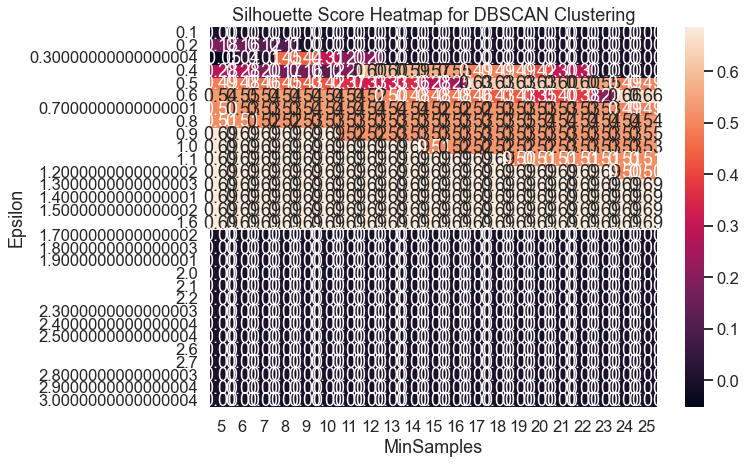

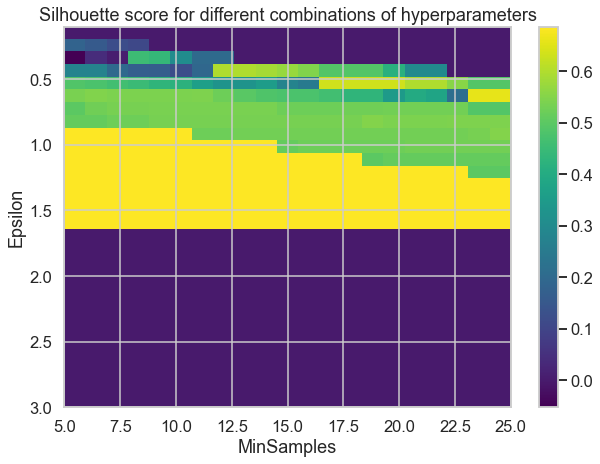

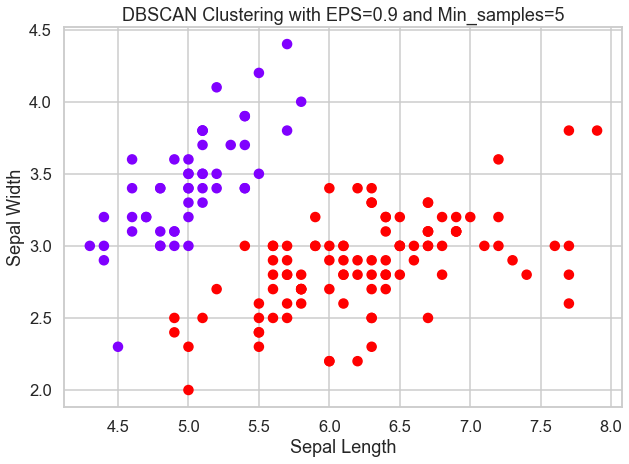

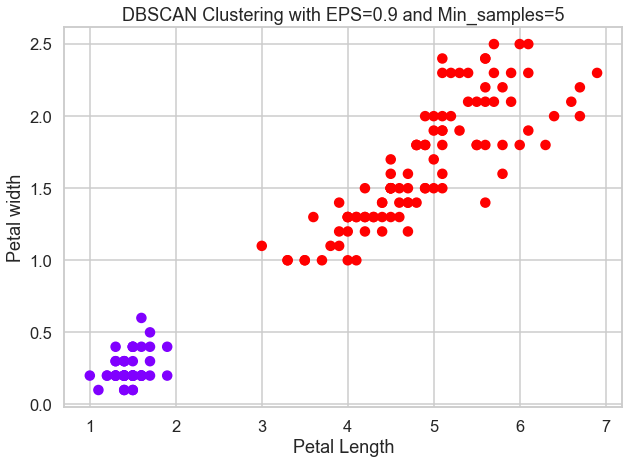

Best Silhouette Score: 0.69


In [22]:
# Define range of hyperparameters to test
Epsilon=np.arange(0.1, 3.1, 0.1)
MinSamples=range(5, 26)
# Loop over hyperparameters and compute silhouette scores
scores = np.zeros((len(Epsilon), len(MinSamples)))
for i, eps in enumerate(Epsilon):
    for j, min_samples in enumerate(MinSamples):
        DBS = DBSCAN(eps=eps, min_samples=min_samples)
        labels = DBS.fit_predict(X)
        if len(np.unique(labels)) == 1:
            continue
        # Compute silhouette score
        if len(set(DBS.labels_)) > 1:
            score = silhouette_score(X, DBS.labels_)
        else:
            score = -1
        
        # Store result
        scores[i, j] = score

# Plot heatmap of silhouette scores versus hyperparameters
plt.figure(figsize=(10, 7))
sns.heatmap(scores, xticklabels=MinSamples, yticklabels=Epsilon, annot=True, fmt='.2f')
plt.xlabel('MinSamples')
plt.ylabel('Epsilon')
plt.title('Silhouette Score Heatmap for DBSCAN Clustering')
plt.show()


# Create a 2D plot of the silhouette scores
fig, ax = plt.subplots(figsize=(10, 7))
im = ax.imshow(scores, cmap='viridis', aspect='auto',extent=[MinSamples[0], MinSamples[-1], Epsilon[-1], Epsilon[0]])
ax.set_xlabel('MinSamples')
ax.set_ylabel('Epsilon')
ax.set_title('Silhouette score for different combinations of hyperparameters')
plt.colorbar(im)
plt.show()

# Find the hyperparameters that give the best silhouette score
BestEpsilonIndex, BestMinSamplesIndex = np.unravel_index(np.argmax(scores), scores.shape)
BestEpsilon = Epsilon[BestEpsilonIndex]
BestMinSamples = MinSamples[BestMinSamplesIndex]

# Run DBSCAN with best hyperparameters
BestLabels = DBSCAN(eps=BestEpsilon, min_samples=BestMinSamples).fit_predict(X)



# Plot resulting clusters
plt.figure(figsize=(10, 7))
plt.scatter(iris_data.data[:, 0], iris_data.data[:, 1], c=BestLabels, cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('DBSCAN Clustering with EPS={:.1f} and Min_samples={}'.format(BestEpsilon, BestMinSamples))
plt.show()
plt.figure(figsize=(10, 7))
plt.scatter(iris_data.data[:, 2], iris_data.data[:, 3], c=BestLabels, cmap='rainbow')
plt.xlabel('Petal Length')
plt.ylabel('Petal width')
plt.title('DBSCAN Clustering with EPS={:.1f} and Min_samples={}'.format(BestEpsilon, BestMinSamples))
plt.show()

# Print best silhouette score
print('Best Silhouette Score: {:.2f}'.format(BestScore))


# Gaussian mixture

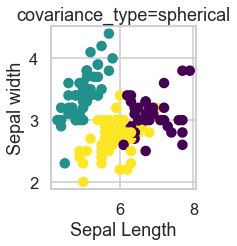

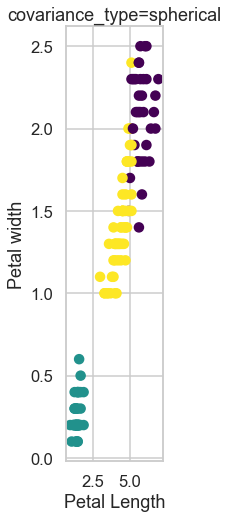

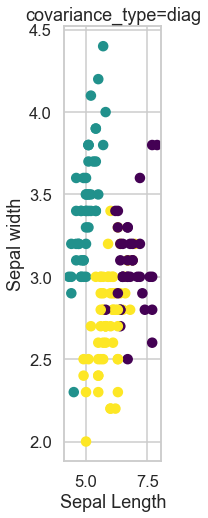

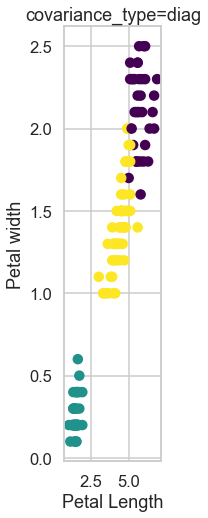

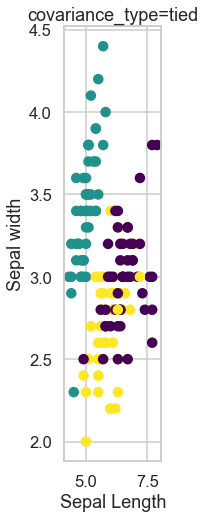

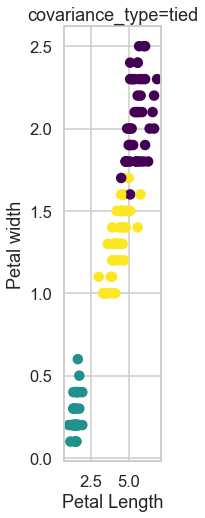

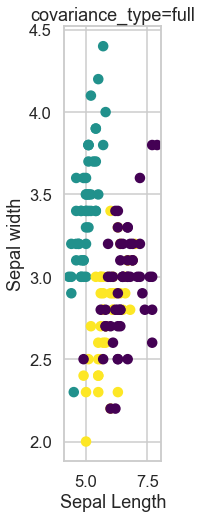

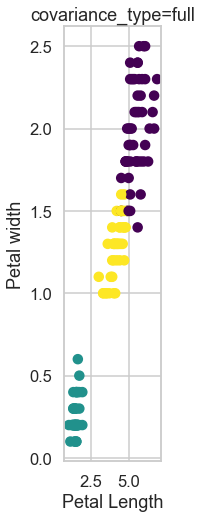

In [23]:
# Fit GMM model with different covariance_type parameters
CovarianceTypes = ['spherical', 'diag', 'tied','full']
plt.figure(figsize=(12, 3))
for i, cov_type in enumerate(CovarianceTypes):
    # Fit GMM model
    gmm = GaussianMixture(n_components=3, covariance_type=cov_type, random_state=42)
    gmm.fit(X)
    y_pred = gmm.predict(X)
    
    # Plot the resulting clusters
    plt.subplot(1, 4, i+1)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal width')
    plt.title(f'covariance_type={cov_type}')
    plt.show()
    plt.subplot(1, 4, i+1)
    plt.scatter(X[:, 2], X[:, 3], c=y_pred, cmap='viridis')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal width')
    plt.title(f'covariance_type={cov_type}')
    plt.show()


In [ ]:
#contour code heree

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

# Normalization for Iris dataset

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
iris_data_norm = scaler.fit_transform(iris_data.data)


In [ ]:
#Another way of normalizing data
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#iris_data_norm = scaler.fit_transform(iris_data.data)


# Kmeans clustering

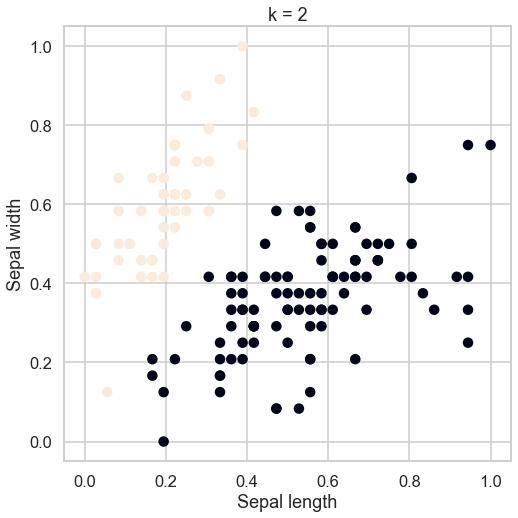

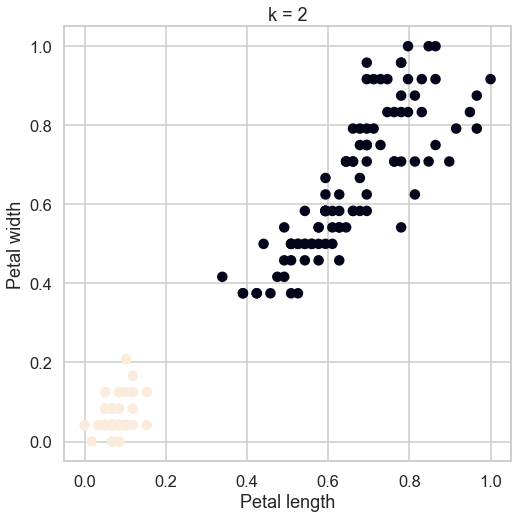

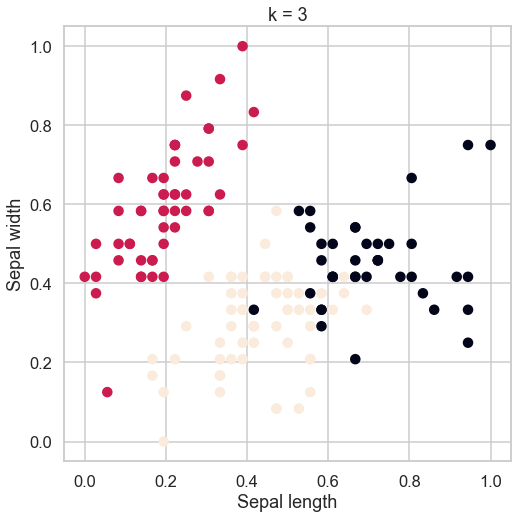

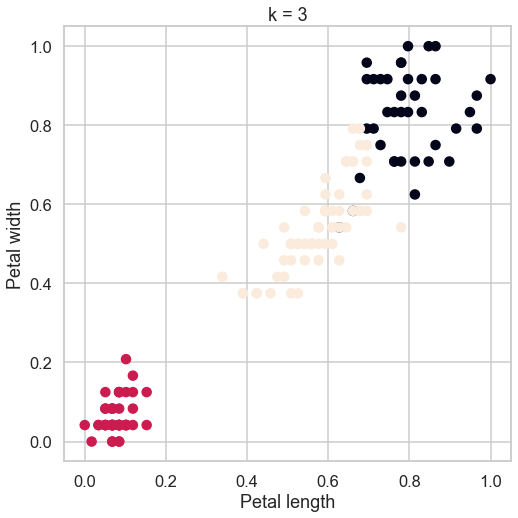

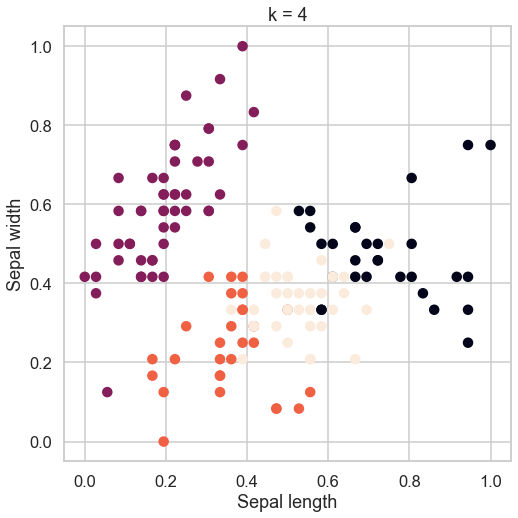

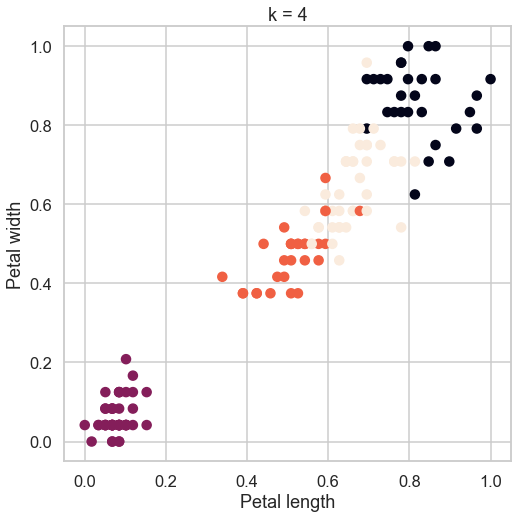

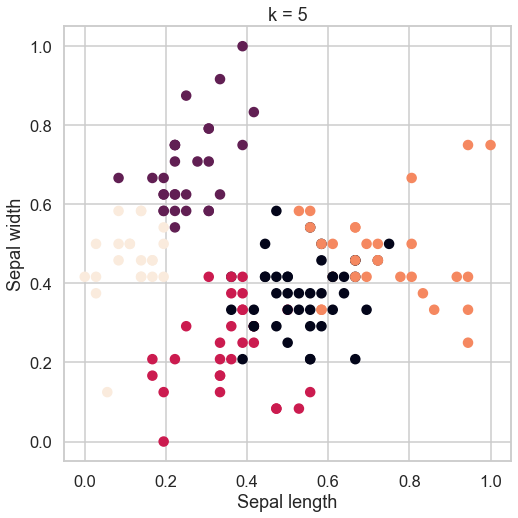

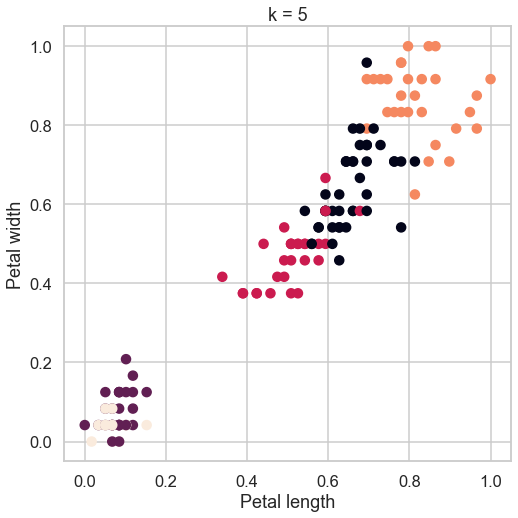

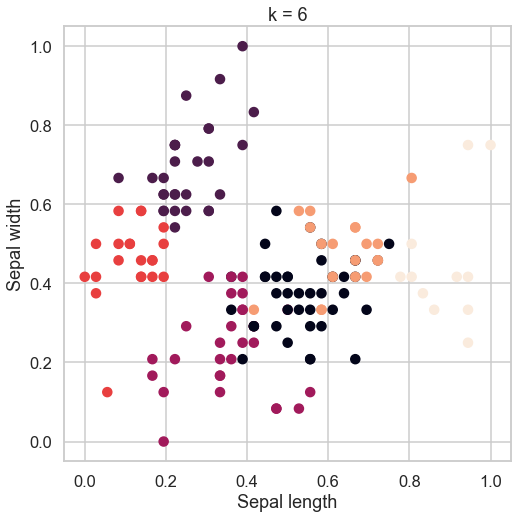

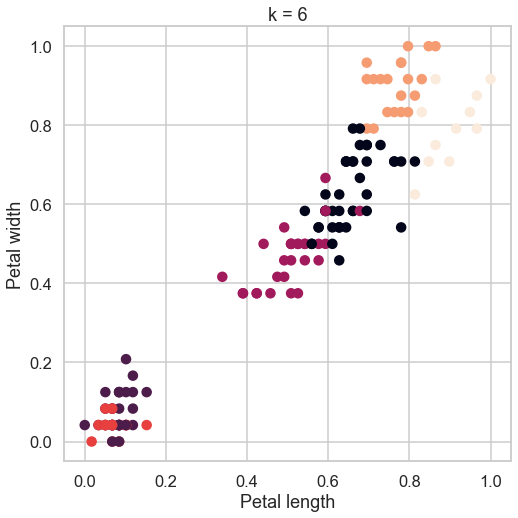

In [26]:
# Define list of values of k to try
Kvalues=range(2,7)
distortions=[]
silhouettes=[]
# Apply k-means clustering for each value of k and plot results
for K in Kvalues:
    # Create k-means model with k clusters
    kmeans = KMeans(n_clusters=K, random_state=42)
    # Fit model to data
    kmeans.fit(iris_data_norm)
    # Get predicted cluster labels for data
    y_pred = kmeans.predict(iris_data_norm)
    distortions.append(kmeans.inertia_)
    if K > 1:
        silhouettes.append(silhouette_score(iris_data_norm, y_pred))
    # Plot results
    plt.scatter(iris_data_norm[:, 0], iris_data_norm[:, 1], c=y_pred)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('k = {}'.format(K))
    plt.show()
    plt.scatter(iris_data_norm[:, 2], iris_data_norm[:, 3], c=y_pred)
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title('k = {}'.format(K))
    plt.show()


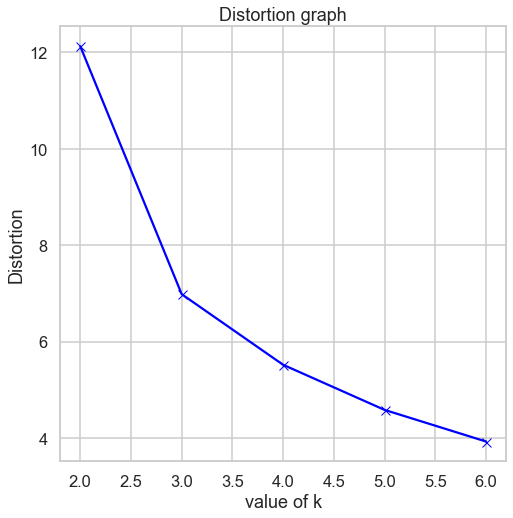

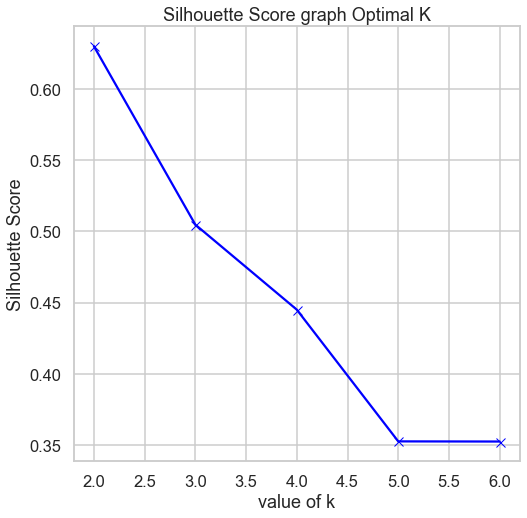

The best K value based on Silhouette Score is: 2


In [27]:
# Plot distortion function vs. K
plt.plot(Kvalues, distortions, 'bx-')
plt.xlabel('value of k')
plt.ylabel('Distortion')
plt.title('Distortion graph')
plt.show()

# Plot silhouette score versus K
plt.plot(Kvalues, silhouettes, 'bx-')
plt.xlabel('value of k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score graph Optimal K')
plt.show()

# Find the best K value based on the highest silhouette score
Bestk = np.argmax(silhouettes) + 2  # Add 2 to account for range of K values starting from 2
print("The best K value based on Silhouette Score is:", Bestk)

# Hierarichal clustering

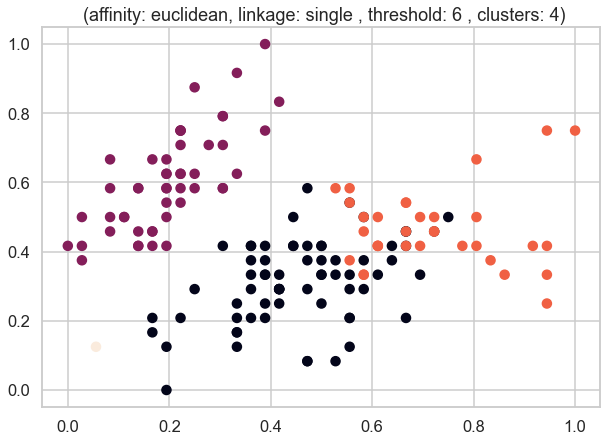

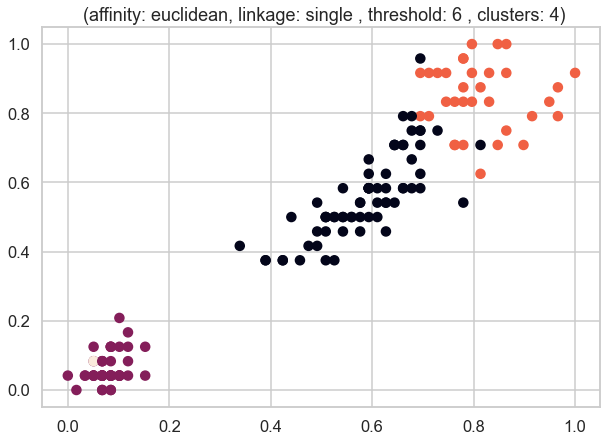

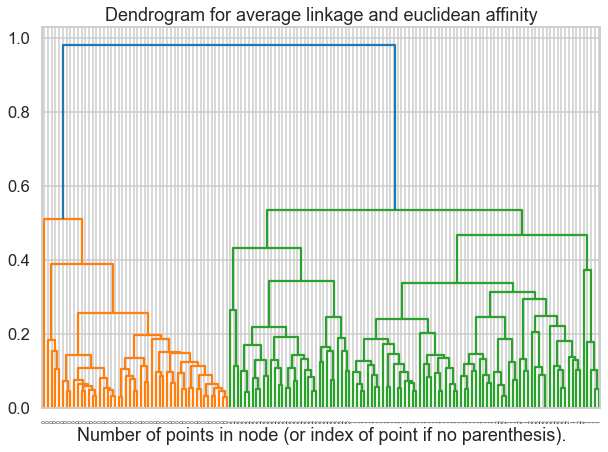

Silhouette score: 0.42411008000074946
Number of clusters: 4


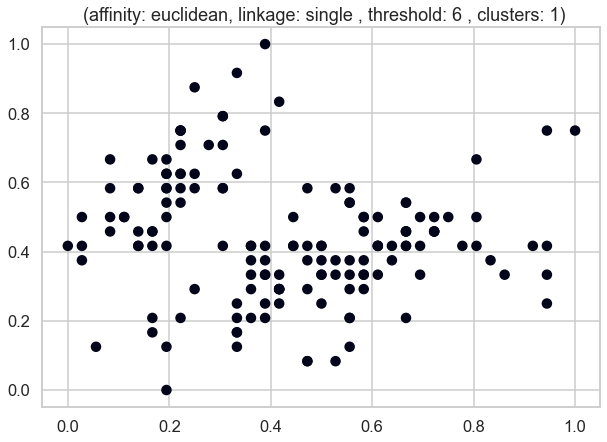

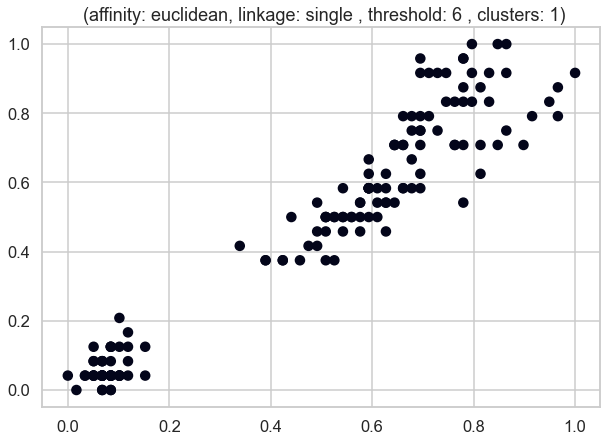

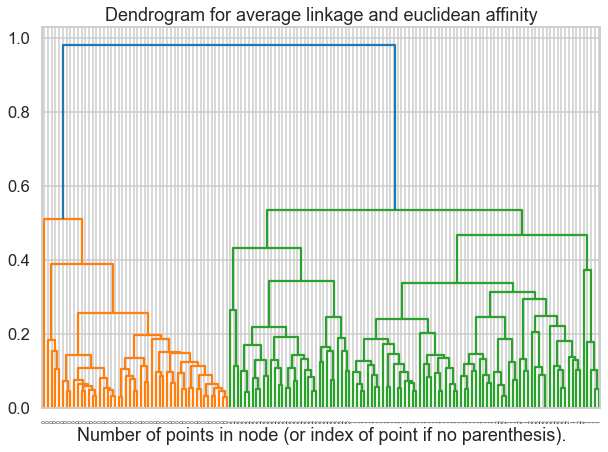

Silhouette score: 0.42411008000074946
Number of clusters: 1


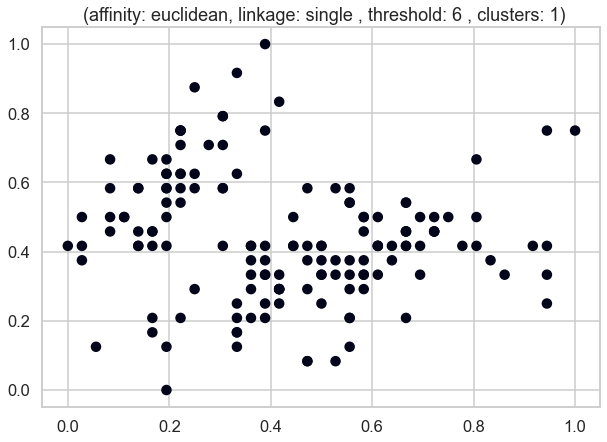

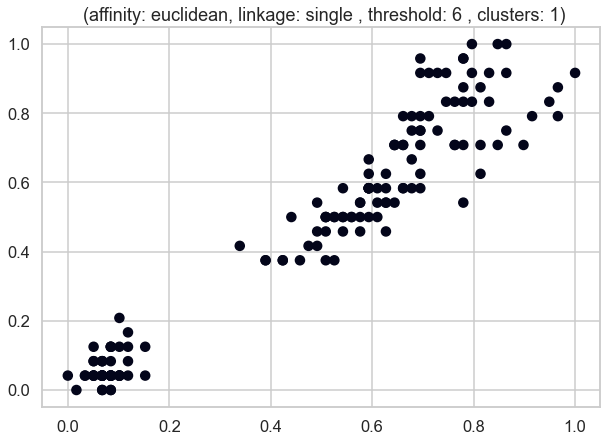

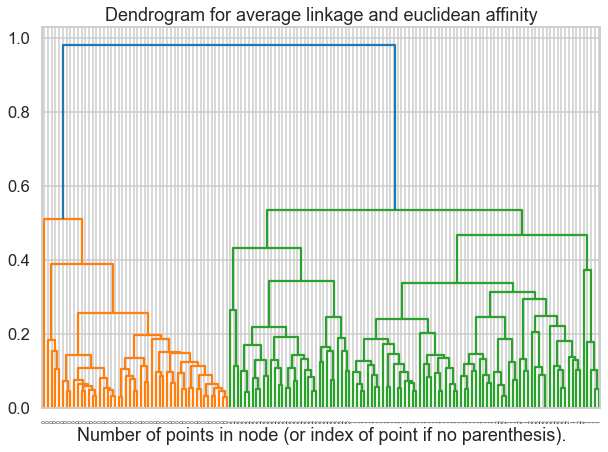

Silhouette score: 0.42411008000074946
Number of clusters: 1


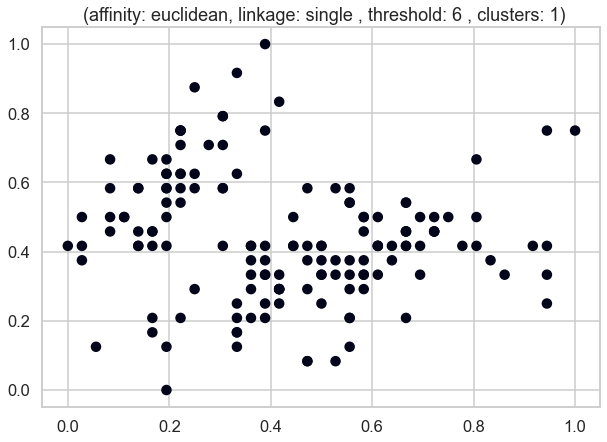

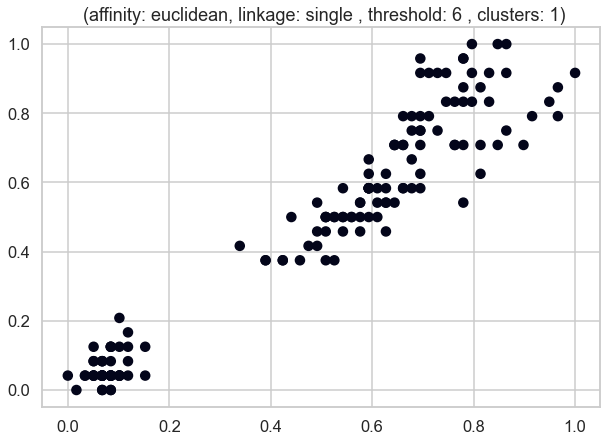

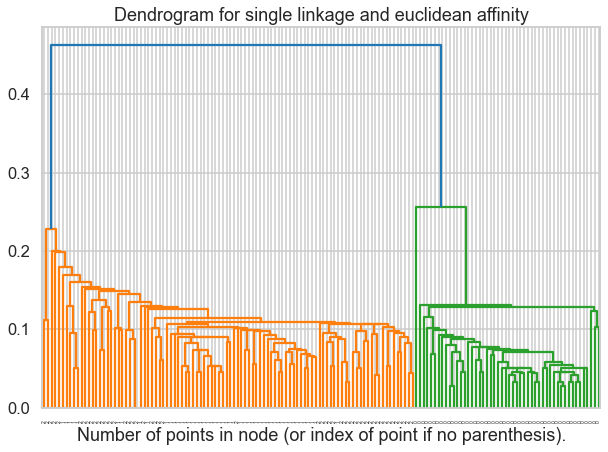

Silhouette score: 0.42411008000074946
Number of clusters: 1


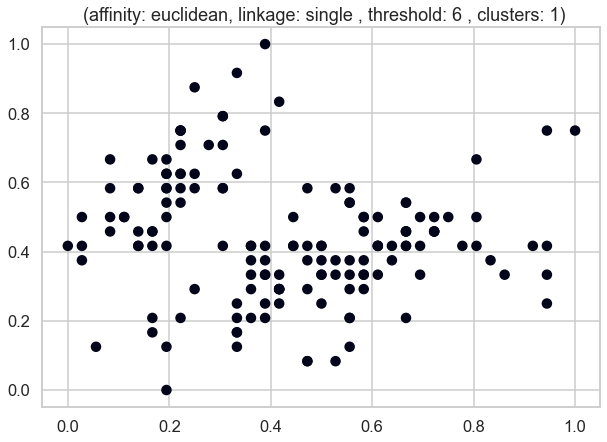

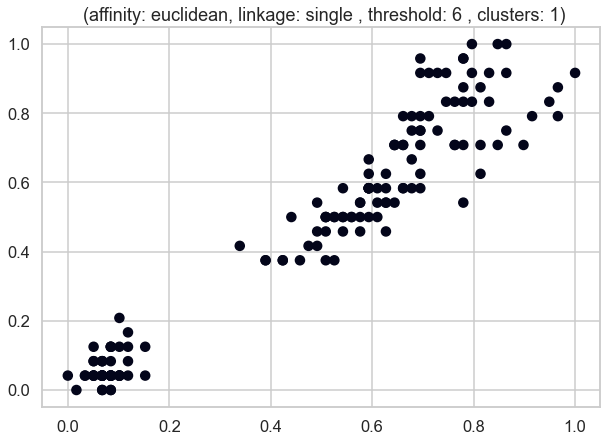

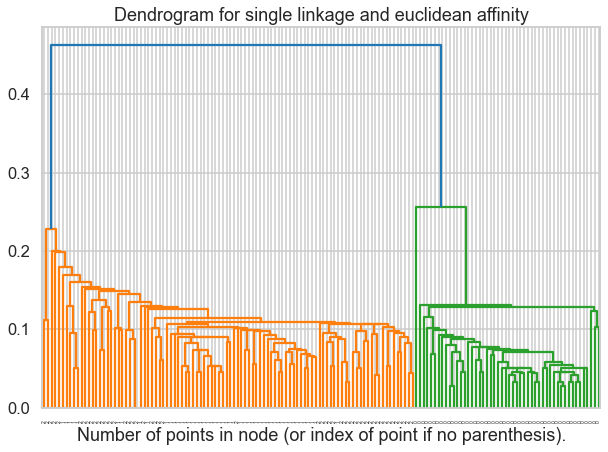

Silhouette score: 0.42411008000074946
Number of clusters: 1


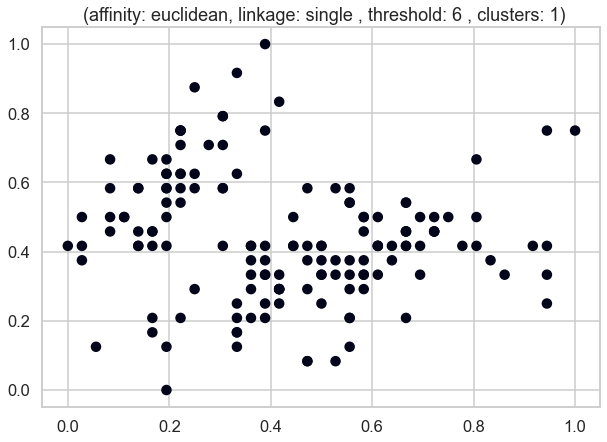

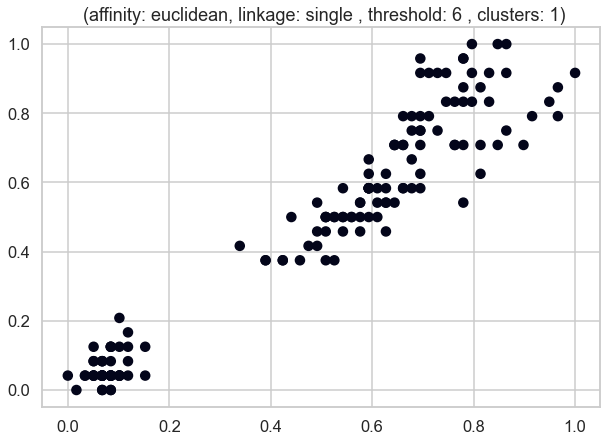

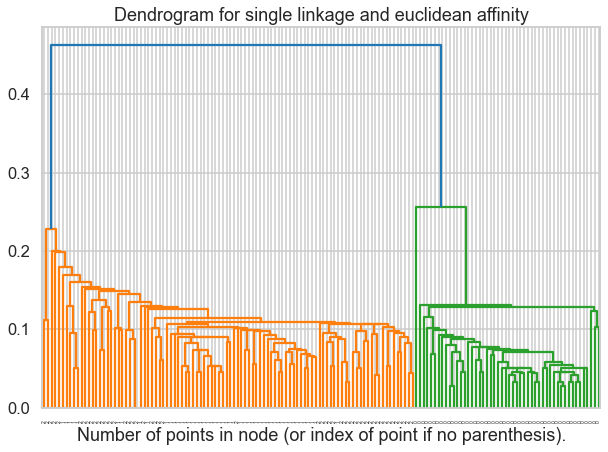

Silhouette score: 0.42411008000074946
Number of clusters: 1


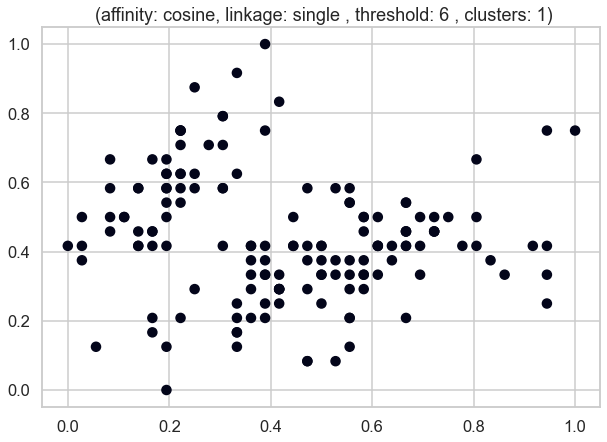

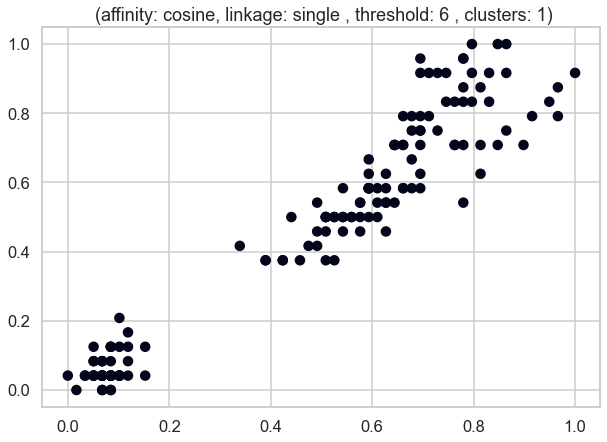

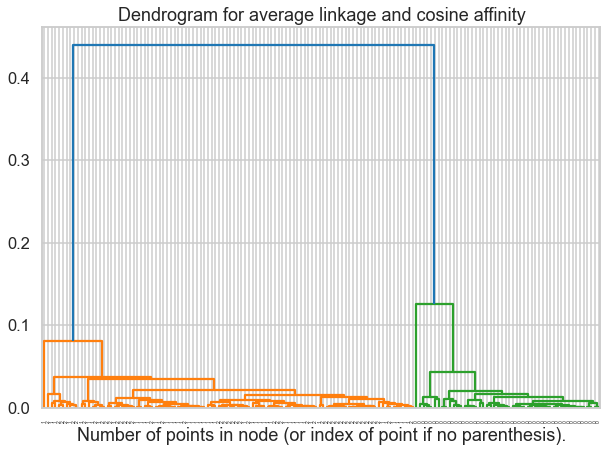

Silhouette score: 0.42411008000074946
Number of clusters: 1


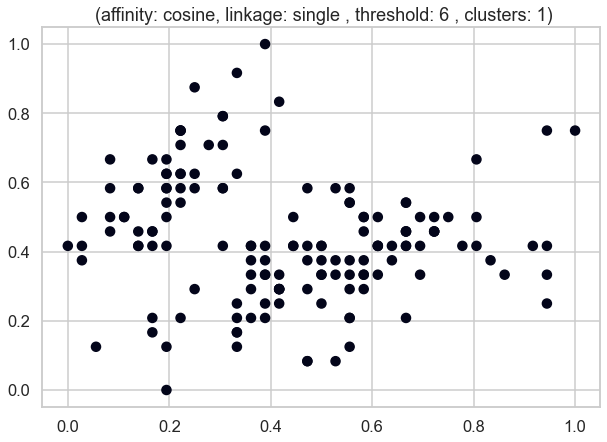

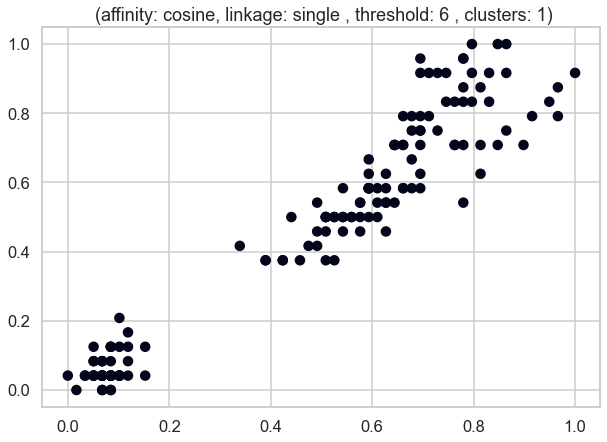

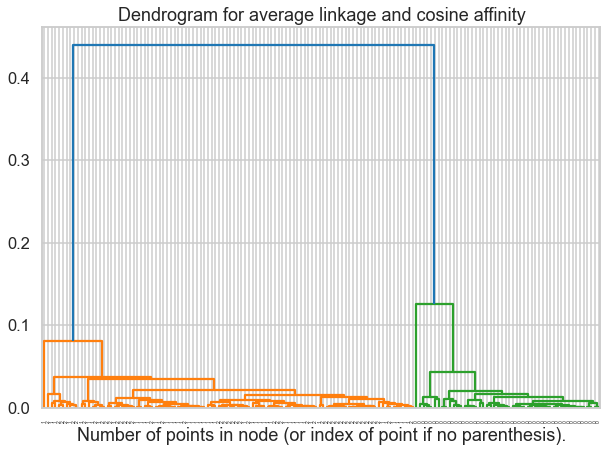

Silhouette score: 0.42411008000074946
Number of clusters: 1


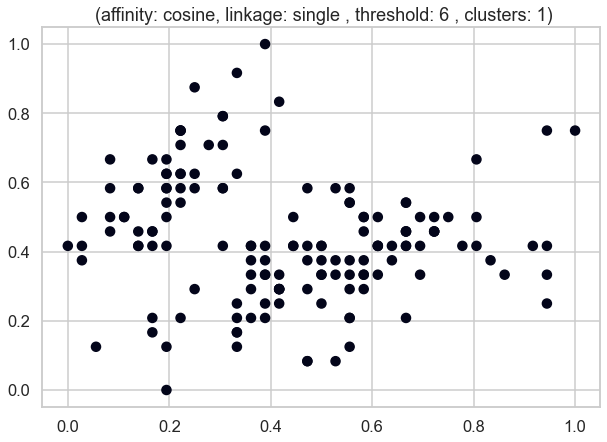

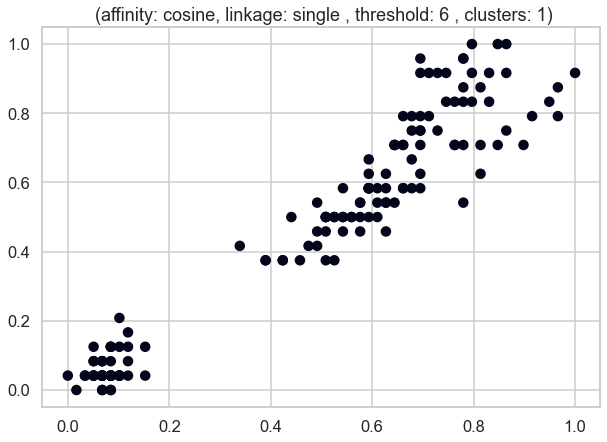

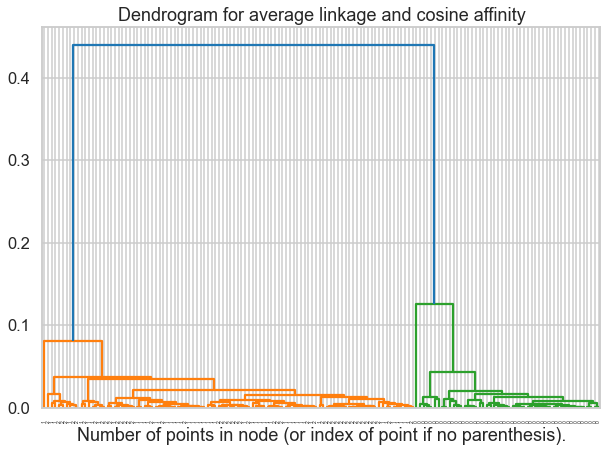

Silhouette score: 0.42411008000074946
Number of clusters: 1


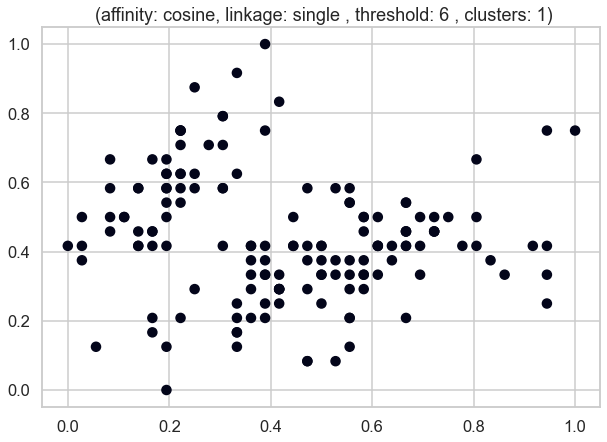

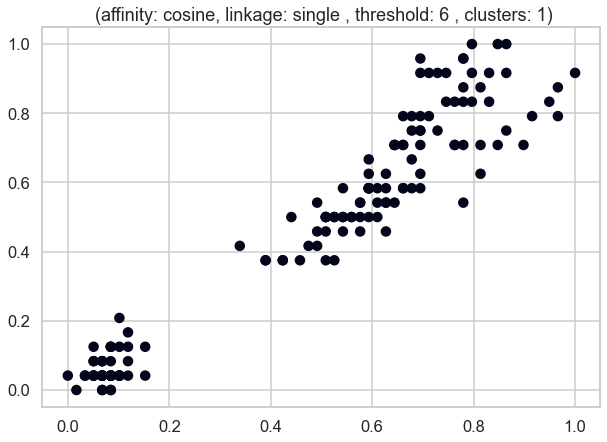

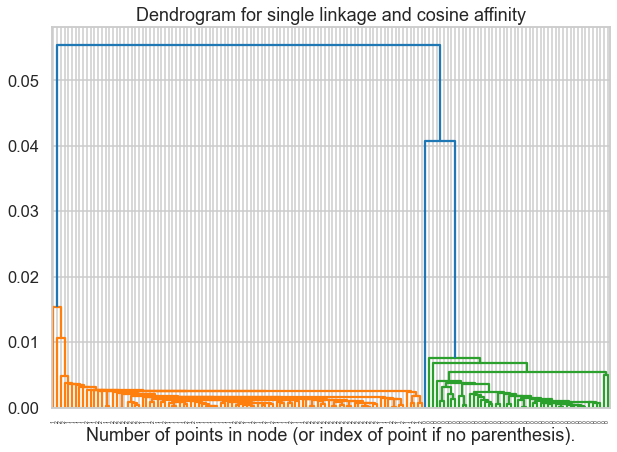

Silhouette score: 0.42411008000074946
Number of clusters: 1


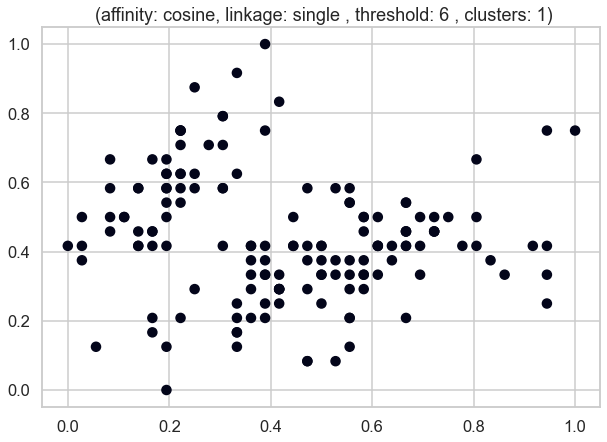

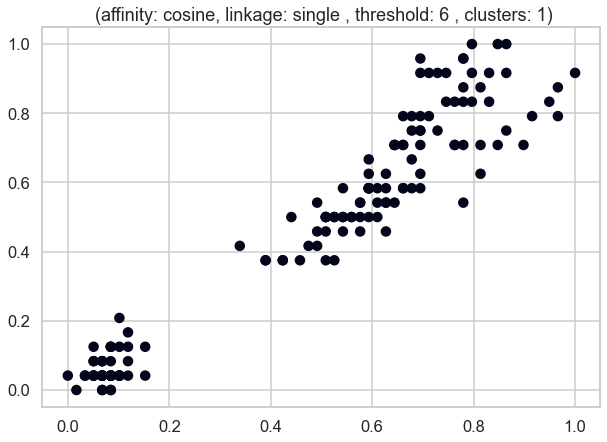

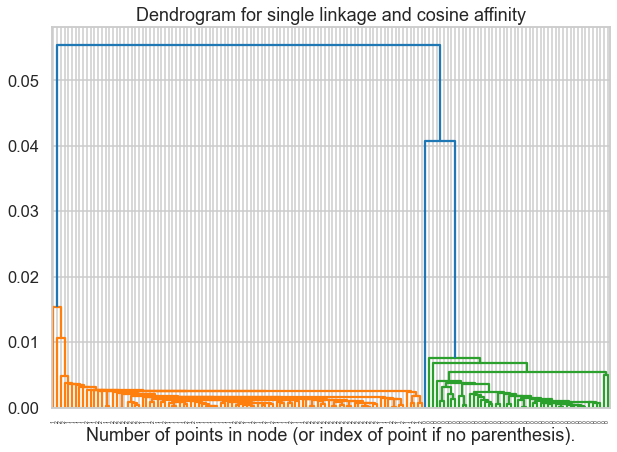

Silhouette score: 0.42411008000074946
Number of clusters: 1


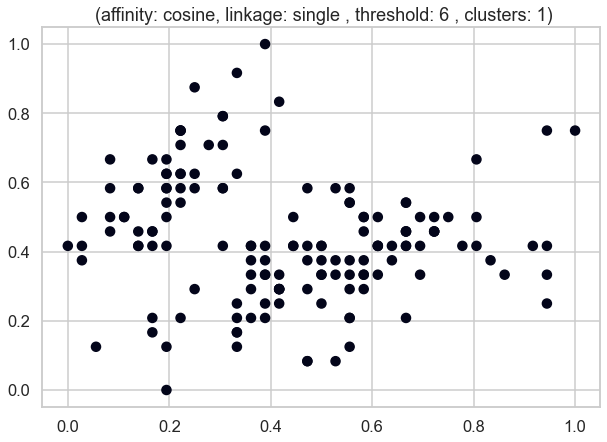

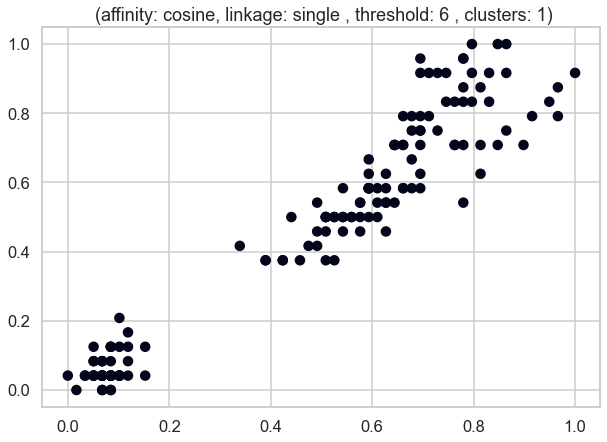

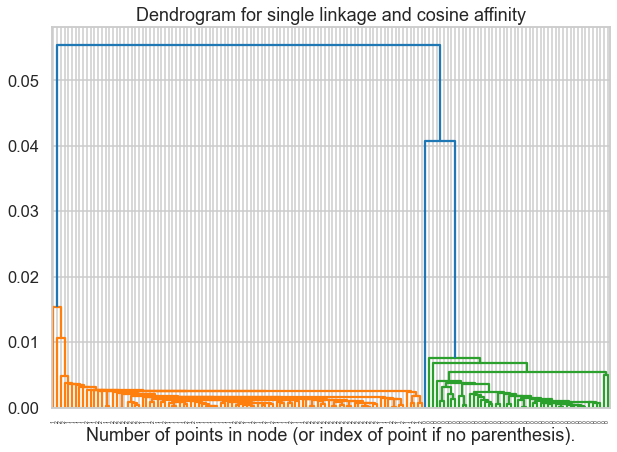

Silhouette score: 0.42411008000074946
Number of clusters: 1
Best Silhouette score: 0.42411008000074946


AttributeError: 'dict' object has no attribute 'labels_'

In [29]:
# define parameter combinations to try
NumOfClusters=[]
affinities=['euclidean', 'cosine']
linkages=['average', 'single']
thresholds=[0.5,2,6]
BestScore=-1
BestModel=None

for affinity in affinities:
    for linkage in linkages:
        for dist_thresh in thresholds:
            HC = AgglomerativeClustering(n_clusters=None,affinity=affinity,linkage=linkage,distance_threshold=dist_thresh)
            labels = HC.fit_predict(iris_data_norm)
            NumOfClusters.append(HC.n_clusters_)
            # Display resulting clusters for current parameter combination
            plt.figure(figsize=(10, 7))
            plt.scatter(iris_data_norm[:, 0], iris_data_norm[:, 1], c=labels)
            plt.title(f" (affinity: {affinity}, linkage: {linkage_method} , threshold: {threshold} , clusters: {HC.n_clusters_})")
            plt.show()
            plt.figure(figsize=(10, 7))
            plt.scatter(iris_data_norm[:, 2], iris_data_norm[:, 3], c=labels)
            plt.title(f" (affinity: {affinity}, linkage: {linkage_method} , threshold: {threshold} , clusters: {HC.n_clusters_})")
            plt.show()
            try:
                score=silhouette_score(iris_data_norm, labels)
            except ValueError:
                pass
            
            # Keep track of best score and best parameters
            if score > BestScore:
                BestScore = score
                BestModel = {"affinity": affinity, "linkage": linkage, "dist_thresh": dist_thresh}
            
            # Display dendrogram for current parameter combination
            plt.figure(figsize=(10, 7))
            plt.title("Dendrogram for {} linkage and {} affinity".format(linkage, affinity))
            distances = pdist(iris_data_norm, metric=affinity)
            Z = hierarchy.linkage(distances, method=linkage)
            dendrogram = hierarchy.dendrogram(Z, labels=iris_data.target)    #not normalized????
            plt.xlabel("Number of points in node (or index of point if no parenthesis).")
            plt.show()
            print(f"Silhouette score: {score}")
            print(f"Number of clusters: {len(set(HC.labels_))}")
        
                
                
            
print(f"Best Silhouette score: {BestScore}")
print(f"Number of clusters in best model: {len(set(BestModel.labels_))}")



# DBscan

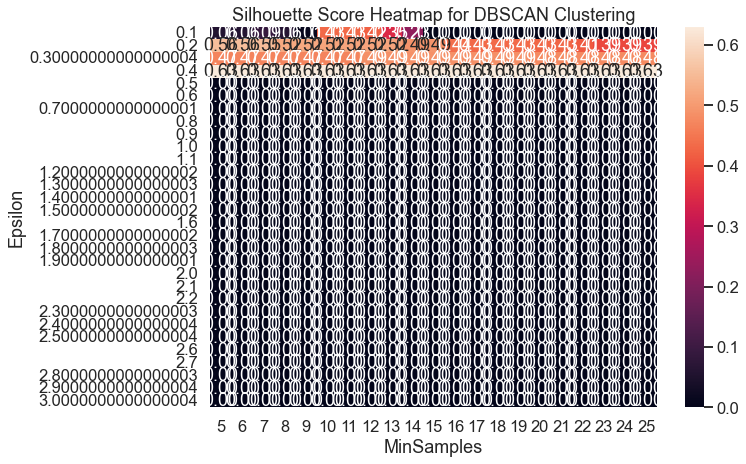

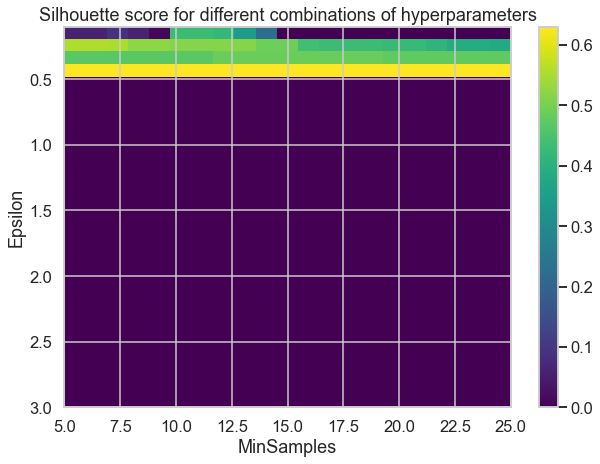

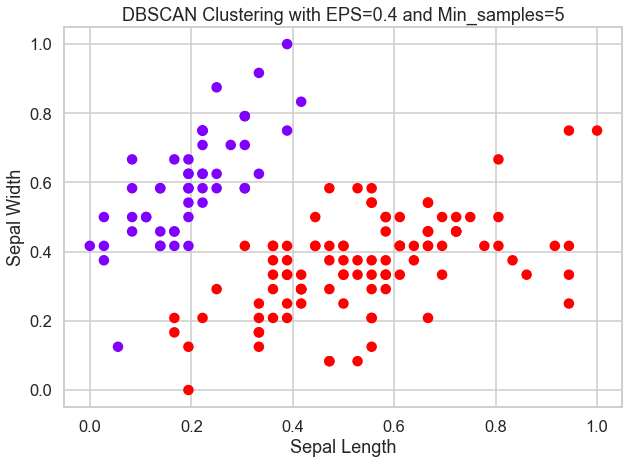

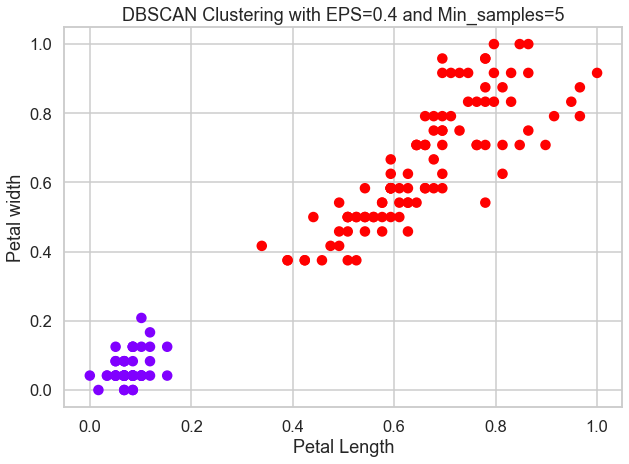

Best Silhouette Score: 0.42


In [30]:
# Define range of hyperparameters to test
Epsilon=np.arange(0.1, 3.1, 0.1)
MinSamples=range(5, 26)
# Loop over hyperparameters and compute silhouette scores
scores = np.zeros((len(Epsilon), len(MinSamples)))
for i, eps in enumerate(Epsilon):
    for j, min_samples in enumerate(MinSamples):
        DBS = DBSCAN(eps=eps, min_samples=min_samples)
        labels = DBS.fit_predict(iris_data_norm)
        if len(np.unique(labels)) == 1:
            continue
        # Compute silhouette score
        if len(set(DBS.labels_)) > 1:
            score = silhouette_score(iris_data_norm, DBS.labels_)
        else:
            score = -1
        
        # Store result
        scores[i, j] = score

# Plot heatmap of silhouette scores versus hyperparameters
plt.figure(figsize=(10, 7))
sns.heatmap(scores, xticklabels=MinSamples, yticklabels=Epsilon, annot=True, fmt='.2f')
plt.xlabel('MinSamples')
plt.ylabel('Epsilon')
plt.title('Silhouette Score Heatmap for DBSCAN Clustering')
plt.show()


# Create a 2D plot of the silhouette scores
fig, ax = plt.subplots(figsize=(10, 7))
im = ax.imshow(scores, cmap='viridis', aspect='auto',extent=[MinSamples[0], MinSamples[-1], Epsilon[-1], Epsilon[0]])
ax.set_xlabel('MinSamples')
ax.set_ylabel('Epsilon')
ax.set_title('Silhouette score for different combinations of hyperparameters')
plt.colorbar(im)
plt.show()

# Find the hyperparameters that give the best silhouette score
BestEpsilonIndex, BestMinSamplesIndex = np.unravel_index(np.argmax(scores), scores.shape)
BestEpsilon = Epsilon[BestEpsilonIndex]
BestMinSamples = MinSamples[BestMinSamplesIndex]

# Run DBSCAN with best hyperparameters
BestLabels = DBSCAN(eps=BestEpsilon, min_samples=BestMinSamples).fit_predict(iris_data_norm)



# Plot resulting clusters
plt.figure(figsize=(10, 7))
plt.scatter(iris_data_norm[:, 0], iris_data_norm[:, 1], c=BestLabels, cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('DBSCAN Clustering with EPS={:.1f} and Min_samples={}'.format(BestEpsilon, BestMinSamples))
plt.show()
plt.figure(figsize=(10, 7))
plt.scatter(iris_data_norm[:, 2], iris_data_norm[:, 3], c=BestLabels, cmap='rainbow')
plt.xlabel('Petal Length')
plt.ylabel('Petal width')
plt.title('DBSCAN Clustering with EPS={:.1f} and Min_samples={}'.format(BestEpsilon, BestMinSamples))
plt.show()

# Print best silhouette score
print('Best Silhouette Score: {:.2f}'.format(BestScore))

## Customer dataset
Repeat all the above on the customer data set 